#Face Classification by Emotion


Adapted from fastai lesson 0 notebook

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size*, and try again.

In [4]:
bs = 64


## Looking at the data

fix citation, kaggle data
26,217 total pictures

Because of knuth storage issues, each emotional category (anger, happy, sad, neutral) has 4 zipfiles

In [35]:
!unzip data/FaceSquares/anger1.zip -d data/FaceSquares/anger
!unzip data/FaceSquares/anger2.zip -d data/FaceSquares/anger
!unzip data/FaceSquares/anger3.zip -d data/FaceSquares/anger
!unzip data/FaceSquares/anger4.zip -d data/FaceSquares/anger

Archive:  data/FaceSquares/anger1.zip
   creating: data/FaceSquares/anger/anger1/
  inflating: data/FaceSquares/anger/anger1/4209.png  
  inflating: data/FaceSquares/anger/anger1/7217.png  
  inflating: data/FaceSquares/anger/anger1/9432.png  
  inflating: data/FaceSquares/anger/anger1/526.png  
  inflating: data/FaceSquares/anger/anger1/9863.png  
  inflating: data/FaceSquares/anger/anger1/9401.png  
  inflating: data/FaceSquares/anger/anger1/5496.png  
  inflating: data/FaceSquares/anger/anger1/3974.png  
  inflating: data/FaceSquares/anger/anger1/5953.png  
  inflating: data/FaceSquares/anger/anger1/7472.png  
  inflating: data/FaceSquares/anger/anger1/6089.png  
  inflating: data/FaceSquares/anger/anger1/9259.png  
  inflating: data/FaceSquares/anger/anger1/5042.png  
  inflating: data/FaceSquares/anger/anger1/7863.png  
  inflating: data/FaceSquares/anger/anger1/2890.png  
  inflating: data/FaceSquares/anger/anger1/2485.png  
  inflating: data/FaceSquares/anger/anger1/4580.png  
 

  inflating: data/FaceSquares/anger/anger1/5903.png  
  inflating: data/FaceSquares/anger/anger1/1795.png  
  inflating: data/FaceSquares/anger/anger1/299.png  
  inflating: data/FaceSquares/anger/anger1/6320.png  
  inflating: data/FaceSquares/anger/anger1/5656.png  
  inflating: data/FaceSquares/anger/anger1/5426.png  
  inflating: data/FaceSquares/anger/anger1/1309.png  
  inflating: data/FaceSquares/anger/anger1/9101.png  
  inflating: data/FaceSquares/anger/anger1/9812.png  
  inflating: data/FaceSquares/anger/anger1/9564.png  
  inflating: data/FaceSquares/anger/anger1/9752.png  
  inflating: data/FaceSquares/anger/anger1/1811.png  
  inflating: data/FaceSquares/anger/anger1/4460.png  
  inflating: data/FaceSquares/anger/anger1/4763.png  
  inflating: data/FaceSquares/anger/anger1/766.png  
  inflating: data/FaceSquares/anger/anger1/375.png  
  inflating: data/FaceSquares/anger/anger1/6899.png  
  inflating: data/FaceSquares/anger/anger1/8403.png  
  inflating: data/FaceSquares/a

  inflating: data/FaceSquares/anger/anger1/7099.png  
  inflating: data/FaceSquares/anger/anger1/8793.png  
  inflating: data/FaceSquares/anger/anger1/9708.png  
  inflating: data/FaceSquares/anger/anger1/6209.png  
  inflating: data/FaceSquares/anger/anger1/4502.png  
  inflating: data/FaceSquares/anger/anger1/7980.png  
  inflating: data/FaceSquares/anger/anger1/8011.png  
  inflating: data/FaceSquares/anger/anger1/4922.png  
  inflating: data/FaceSquares/anger/anger1/8999.png  
  inflating: data/FaceSquares/anger/anger1/1928.png  
  inflating: data/FaceSquares/anger/anger1/2341.png  
  inflating: data/FaceSquares/anger/anger1/3607.png  
  inflating: data/FaceSquares/anger/anger1/4684.png  
  inflating: data/FaceSquares/anger/anger1/4318.png  
  inflating: data/FaceSquares/anger/anger1/2226.png  
  inflating: data/FaceSquares/anger/anger1/7361.png  
  inflating: data/FaceSquares/anger/anger1/1996.png  
  inflating: data/FaceSquares/anger/anger1/2180.png  
  inflating: data/FaceSquare

  inflating: data/FaceSquares/anger/anger1/4671.png  
  inflating: data/FaceSquares/anger/anger1/158.png  
  inflating: data/FaceSquares/anger/anger1/9877.png  
  inflating: data/FaceSquares/anger/anger1/2194.png  
  inflating: data/FaceSquares/anger/anger1/7957.png  
  inflating: data/FaceSquares/anger/anger1/8922.png  
  inflating: data/FaceSquares/anger/anger1/5968.png  
  inflating: data/FaceSquares/anger/anger1/1373.png  
  inflating: data/FaceSquares/anger/anger1/8770.png  
  inflating: data/FaceSquares/anger/anger1/3143.png  
  inflating: data/FaceSquares/anger/anger1/4061.png  
  inflating: data/FaceSquares/anger/anger1/7733.png  
  inflating: data/FaceSquares/anger/anger1/3204.png  
  inflating: data/FaceSquares/anger/anger1/4751.png  
  inflating: data/FaceSquares/anger/anger1/6131.png  
  inflating: data/FaceSquares/anger/anger1/9756.png  
  inflating: data/FaceSquares/anger/anger1/7239.png  
  inflating: data/FaceSquares/anger/anger1/6928.png  
  inflating: data/FaceSquares

  inflating: data/FaceSquares/anger/anger1/9105.png  
  inflating: data/FaceSquares/anger/anger1/9783.png  
  inflating: data/FaceSquares/anger/anger1/77.png  
  inflating: data/FaceSquares/anger/anger1/1445.png  
  inflating: data/FaceSquares/anger/anger1/3554.png  
  inflating: data/FaceSquares/anger/anger1/9584.png  
  inflating: data/FaceSquares/anger/anger1/9536.png  
  inflating: data/FaceSquares/anger/anger1/1791.png  
  inflating: data/FaceSquares/anger/anger1/4074.png  
  inflating: data/FaceSquares/anger/anger1/6727.png  
  inflating: data/FaceSquares/anger/anger1/609.png  
  inflating: data/FaceSquares/anger/anger1/8735.png  
  inflating: data/FaceSquares/anger/anger1/5093.png  
  inflating: data/FaceSquares/anger/anger1/78.png  
  inflating: data/FaceSquares/anger/anger1/5427.png  
  inflating: data/FaceSquares/anger/anger1/8078.png  
  inflating: data/FaceSquares/anger/anger1/7352.png  
  inflating: data/FaceSquares/anger/anger1/2710.png  
  inflating: data/FaceSquares/ang

  inflating: data/FaceSquares/anger/__MACOSX/anger1/._.DS_Store  
  inflating: data/FaceSquares/anger/anger1/6123.png  
  inflating: data/FaceSquares/anger/anger1/1737.png  
  inflating: data/FaceSquares/anger/anger1/8423.png  
  inflating: data/FaceSquares/anger/anger1/1596.png  
  inflating: data/FaceSquares/anger/anger1/9529.png  
  inflating: data/FaceSquares/anger/anger1/5487.png  
  inflating: data/FaceSquares/anger/anger1/6271.png  
  inflating: data/FaceSquares/anger/anger1/7297.png  
  inflating: data/FaceSquares/anger/anger1/5532.png  
  inflating: data/FaceSquares/anger/anger1/3809.png  
  inflating: data/FaceSquares/anger/anger1/2080.png  
  inflating: data/FaceSquares/anger/anger1/9624.png  
  inflating: data/FaceSquares/anger/anger1/3818.png  
  inflating: data/FaceSquares/anger/anger1/187.png  
  inflating: data/FaceSquares/anger/anger1/8015.png  
  inflating: data/FaceSquares/anger/anger1/3717.png  
  inflating: data/FaceSquares/anger/anger1/1413.png  
  inflating: data

  inflating: data/FaceSquares/anger/anger1/3250.png  
  inflating: data/FaceSquares/anger/anger1/3490.png  
  inflating: data/FaceSquares/anger/anger1/1777.png  
  inflating: data/FaceSquares/anger/anger1/5571.png  
  inflating: data/FaceSquares/anger/anger1/3122.png  
  inflating: data/FaceSquares/anger/anger1/7579.png  
  inflating: data/FaceSquares/anger/anger1/2910.png  
  inflating: data/FaceSquares/anger/anger1/527.png  
  inflating: data/FaceSquares/anger/anger1/9885.png  
  inflating: data/FaceSquares/anger/anger1/6622.png  
  inflating: data/FaceSquares/anger/anger1/6056.png  
  inflating: data/FaceSquares/anger/anger1/4824.png  
  inflating: data/FaceSquares/anger/anger1/8516.png  
  inflating: data/FaceSquares/anger/anger1/4617.png  
  inflating: data/FaceSquares/anger/anger1/8222.png  
  inflating: data/FaceSquares/anger/anger1/75.png  
  inflating: data/FaceSquares/anger/anger1/7712.png  
  inflating: data/FaceSquares/anger/anger1/7912.png  
  inflating: data/FaceSquares/a

  inflating: data/FaceSquares/anger/anger1/7168.png  
  inflating: data/FaceSquares/anger/anger1/5409.png  
  inflating: data/FaceSquares/anger/anger1/2779.png  
  inflating: data/FaceSquares/anger/anger1/5926.png  
  inflating: data/FaceSquares/anger/anger1/4908.png  
  inflating: data/FaceSquares/anger/anger1/8888.png  
  inflating: data/FaceSquares/anger/anger1/1300.png  
  inflating: data/FaceSquares/anger/anger1/8750.png  
  inflating: data/FaceSquares/anger/anger1/4504.png  
  inflating: data/FaceSquares/anger/anger1/8582.png  
  inflating: data/FaceSquares/anger/anger1/6491.png  
  inflating: data/FaceSquares/anger/anger1/3054.png  
  inflating: data/FaceSquares/anger/anger1/4971.png  
  inflating: data/FaceSquares/anger/anger1/5440.png  
  inflating: data/FaceSquares/anger/anger1/1598.png  
  inflating: data/FaceSquares/anger/anger1/5006.png  
  inflating: data/FaceSquares/anger/anger1/3321.png  
  inflating: data/FaceSquares/anger/anger1/2712.png  
  inflating: data/FaceSquare

  inflating: data/FaceSquares/anger/16219.png  
  inflating: data/FaceSquares/anger/17000.png  
  inflating: data/FaceSquares/anger/10820.png  
  inflating: data/FaceSquares/anger/15483.png  
  inflating: data/FaceSquares/anger/11884.png  
  inflating: data/FaceSquares/anger/16440.png  
  inflating: data/FaceSquares/anger/13217.png  
  inflating: data/FaceSquares/anger/13409.png  
  inflating: data/FaceSquares/anger/18329.png  
  inflating: data/FaceSquares/anger/16125.png  
  inflating: data/FaceSquares/anger/11562.png  
  inflating: data/FaceSquares/anger/11114.png  
  inflating: data/FaceSquares/anger/20484.png  
  inflating: data/FaceSquares/anger/10311.png  
  inflating: data/FaceSquares/anger/18589.png  
  inflating: data/FaceSquares/anger/15927.png  
  inflating: data/FaceSquares/anger/12457.png  
  inflating: data/FaceSquares/anger/19513.png  
  inflating: data/FaceSquares/anger/11387.png  
  inflating: data/FaceSquares/anger/15084.png  
  inflating: data/FaceSquares/anger/1725

  inflating: data/FaceSquares/anger/19332.png  
  inflating: data/FaceSquares/anger/19580.png  
  inflating: data/FaceSquares/anger/13224.png  
  inflating: data/FaceSquares/anger/12614.png  
  inflating: data/FaceSquares/anger/13798.png  
  inflating: data/FaceSquares/anger/16212.png  
  inflating: data/FaceSquares/anger/12035.png  
  inflating: data/FaceSquares/anger/11003.png  
  inflating: data/FaceSquares/anger/19689.png  
  inflating: data/FaceSquares/anger/13183.png  
  inflating: data/FaceSquares/anger/19328.png  
  inflating: data/FaceSquares/anger/12236.png  
  inflating: data/FaceSquares/anger/14499.png  
  inflating: data/FaceSquares/anger/10552.png  
  inflating: data/FaceSquares/anger/17946.png  
  inflating: data/FaceSquares/anger/18306.png  
  inflating: data/FaceSquares/anger/17317.png  
  inflating: data/FaceSquares/anger/13512.png  
  inflating: data/FaceSquares/anger/16699.png  
  inflating: data/FaceSquares/anger/14360.png  
  inflating: data/FaceSquares/anger/1882

  inflating: data/FaceSquares/anger/11084.png  
  inflating: data/FaceSquares/anger/18186.png  
  inflating: data/FaceSquares/anger/17299.png  
  inflating: data/FaceSquares/anger/18416.png  
  inflating: data/FaceSquares/anger/11987.png  
  inflating: data/FaceSquares/anger/17054.png  
  inflating: data/FaceSquares/anger/10064.png  
  inflating: data/FaceSquares/anger/18814.png  
  inflating: data/FaceSquares/anger/13608.png  
 extracting: data/FaceSquares/anger/11404.png  
  inflating: data/FaceSquares/anger/19459.png  
  inflating: data/FaceSquares/anger/15991.png  
  inflating: data/FaceSquares/anger/15322.png  
  inflating: data/FaceSquares/anger/15663.png  
  inflating: data/FaceSquares/anger/11061.png  
  inflating: data/FaceSquares/anger/11614.png  
  inflating: data/FaceSquares/anger/11326.png  
  inflating: data/FaceSquares/anger/11695.png  
  inflating: data/FaceSquares/anger/15090.png  
  inflating: data/FaceSquares/anger/13400.png  
  inflating: data/FaceSquares/anger/1202

  inflating: data/FaceSquares/anger/18236.png  
  inflating: data/FaceSquares/anger/19068.png  
  inflating: data/FaceSquares/anger/15772.png  
  inflating: data/FaceSquares/anger/12276.png  
  inflating: data/FaceSquares/anger/12477.png  
  inflating: data/FaceSquares/anger/16609.png  
  inflating: data/FaceSquares/anger/18108.png  
  inflating: data/FaceSquares/anger/10966.png  
  inflating: data/FaceSquares/anger/12854.png  
  inflating: data/FaceSquares/anger/14143.png  
  inflating: data/FaceSquares/anger/17156.png  
  inflating: data/FaceSquares/anger/20478.png  
  inflating: data/FaceSquares/anger/15400.png  
  inflating: data/FaceSquares/anger/10744.png  
  inflating: data/FaceSquares/anger/17715.png  
  inflating: data/FaceSquares/anger/11152.png  
  inflating: data/FaceSquares/anger/14345.png  
  inflating: data/FaceSquares/anger/18442.png  
  inflating: data/FaceSquares/anger/10971.png  
  inflating: data/FaceSquares/anger/13404.png  
  inflating: data/FaceSquares/anger/1688

  inflating: data/FaceSquares/anger/17648.png  
  inflating: data/FaceSquares/anger/16566.png  
  inflating: data/FaceSquares/anger/10584.png  
  inflating: data/FaceSquares/anger/17956.png  
  inflating: data/FaceSquares/anger/16973.png  
  inflating: data/FaceSquares/anger/13396.png  
  inflating: data/FaceSquares/anger/18330.png  
  inflating: data/FaceSquares/anger/16028.png  
  inflating: data/FaceSquares/anger/12877.png  
  inflating: data/FaceSquares/anger/16673.png  
  inflating: data/FaceSquares/anger/19867.png  
  inflating: data/FaceSquares/anger/13637.png  
  inflating: data/FaceSquares/anger/15770.png  
  inflating: data/FaceSquares/anger/16878.png  
  inflating: data/FaceSquares/anger/15621.png  
  inflating: data/FaceSquares/anger/14720.png  
  inflating: data/FaceSquares/anger/17680.png  
  inflating: data/FaceSquares/anger/17260.png  
  inflating: data/FaceSquares/anger/20881.png  
  inflating: data/FaceSquares/anger/16957.png  
  inflating: data/FaceSquares/anger/1309

  inflating: data/FaceSquares/anger/16262.png  
  inflating: data/FaceSquares/anger/13845.png  
  inflating: data/FaceSquares/anger/13096.png  
  inflating: data/FaceSquares/anger/16930.png  
  inflating: data/FaceSquares/anger/19406.png  
  inflating: data/FaceSquares/anger/17701.png  
  inflating: data/FaceSquares/anger/18818.png  
  inflating: data/FaceSquares/anger/18811.png  
  inflating: data/FaceSquares/anger/17537.png  
  inflating: data/FaceSquares/anger/18079.png  
  inflating: data/FaceSquares/anger/10197.png  
  inflating: data/FaceSquares/anger/18009.png  
  inflating: data/FaceSquares/anger/18721.png  
  inflating: data/FaceSquares/anger/16425.png  
  inflating: data/FaceSquares/anger/11642.png  
  inflating: data/FaceSquares/anger/16272.png  
  inflating: data/FaceSquares/anger/17775.png  
  inflating: data/FaceSquares/anger/10326.png  
  inflating: data/FaceSquares/anger/14369.png  
  inflating: data/FaceSquares/anger/10593.png  
  inflating: data/FaceSquares/anger/1917

  inflating: data/FaceSquares/anger/28895.png  
  inflating: data/FaceSquares/anger/29861.png  
  inflating: data/FaceSquares/anger/22442.png  
  inflating: data/FaceSquares/anger/27968.png  
  inflating: data/FaceSquares/anger/22552.png  
  inflating: data/FaceSquares/anger/28738.png  
  inflating: data/FaceSquares/anger/31236.png  
  inflating: data/FaceSquares/anger/27492.png  
  inflating: data/FaceSquares/anger/29583.png  
  inflating: data/FaceSquares/anger/21637.png  
  inflating: data/FaceSquares/anger/20918.png  
  inflating: data/FaceSquares/anger/30025.png  
  inflating: data/FaceSquares/anger/30832.png  
  inflating: data/FaceSquares/anger/24651.png  
  inflating: data/FaceSquares/anger/31194.png  
  inflating: data/FaceSquares/anger/21724.png  
  inflating: data/FaceSquares/anger/28661.png  
  inflating: data/FaceSquares/anger/24007.png  
  inflating: data/FaceSquares/anger/28841.png  
  inflating: data/FaceSquares/anger/27463.png  
  inflating: data/FaceSquares/anger/2693

  inflating: data/FaceSquares/anger/23332.png  
  inflating: data/FaceSquares/anger/22069.png  
  inflating: data/FaceSquares/anger/25256.png  
  inflating: data/FaceSquares/anger/21217.png  
  inflating: data/FaceSquares/anger/24442.png  
  inflating: data/FaceSquares/anger/25138.png  
  inflating: data/FaceSquares/anger/24256.png  
  inflating: data/FaceSquares/anger/24126.png  
  inflating: data/FaceSquares/anger/30027.png  
  inflating: data/FaceSquares/anger/22144.png  
  inflating: data/FaceSquares/anger/21161.png  
  inflating: data/FaceSquares/anger/27017.png  
  inflating: data/FaceSquares/anger/27024.png  
  inflating: data/FaceSquares/anger/28970.png  
  inflating: data/FaceSquares/anger/23409.png  
  inflating: data/FaceSquares/anger/28419.png  
  inflating: data/FaceSquares/anger/26332.png  
  inflating: data/FaceSquares/anger/23872.png  
  inflating: data/FaceSquares/anger/23641.png  
  inflating: data/FaceSquares/anger/27114.png  
  inflating: data/FaceSquares/anger/2217

  inflating: data/FaceSquares/anger/25032.png  
  inflating: data/FaceSquares/anger/22921.png  
  inflating: data/FaceSquares/anger/21640.png  
  inflating: data/FaceSquares/anger/25375.png  
  inflating: data/FaceSquares/anger/28832.png  
  inflating: data/FaceSquares/anger/25866.png  
  inflating: data/FaceSquares/anger/26730.png  
  inflating: data/FaceSquares/anger/29471.png  
  inflating: data/FaceSquares/anger/28687.png  
  inflating: data/FaceSquares/anger/23197.png  
  inflating: data/FaceSquares/anger/21014.png  
  inflating: data/FaceSquares/anger/22500.png  
  inflating: data/FaceSquares/anger/24988.png  
  inflating: data/FaceSquares/anger/26100.png  
  inflating: data/FaceSquares/anger/21348.png  
  inflating: data/FaceSquares/anger/24676.png  
  inflating: data/FaceSquares/anger/30494.png  
  inflating: data/FaceSquares/anger/27545.png  
  inflating: data/FaceSquares/anger/26658.png  
  inflating: data/FaceSquares/anger/27654.png  
  inflating: data/FaceSquares/anger/2508

  inflating: data/FaceSquares/anger/29540.png  
  inflating: data/FaceSquares/anger/22376.png  
  inflating: data/FaceSquares/anger/22808.png  
  inflating: data/FaceSquares/anger/22199.png  
  inflating: data/FaceSquares/anger/27521.png  
  inflating: data/FaceSquares/anger/21184.png  
  inflating: data/FaceSquares/anger/21506.png  
  inflating: data/FaceSquares/anger/25965.png  
  inflating: data/FaceSquares/anger/26257.png  
  inflating: data/FaceSquares/anger/28605.png  
  inflating: data/FaceSquares/anger/24543.png  
  inflating: data/FaceSquares/anger/27014.png  
  inflating: data/FaceSquares/anger/28933.png  
  inflating: data/FaceSquares/anger/20913.png  
  inflating: data/FaceSquares/anger/29572.png  
  inflating: data/FaceSquares/anger/28149.png  
  inflating: data/FaceSquares/anger/30873.png  
  inflating: data/FaceSquares/anger/21924.png  
  inflating: data/FaceSquares/anger/29462.png  
  inflating: data/FaceSquares/anger/27280.png  
  inflating: data/FaceSquares/anger/2684

  inflating: data/FaceSquares/anger/22251.png  
  inflating: data/FaceSquares/anger/27512.png  
  inflating: data/FaceSquares/anger/27328.png  
  inflating: data/FaceSquares/anger/20927.png  
  inflating: data/FaceSquares/anger/30414.png  
  inflating: data/FaceSquares/anger/21397.png  
  inflating: data/FaceSquares/anger/31623.png  
  inflating: data/FaceSquares/anger/23757.png  
  inflating: data/FaceSquares/anger/21574.png  
  inflating: data/FaceSquares/anger/25722.png  
  inflating: data/FaceSquares/anger/29504.png  
  inflating: data/FaceSquares/anger/31695.png  
  inflating: data/FaceSquares/anger/25362.png  
  inflating: data/FaceSquares/anger/31032.png  
  inflating: data/FaceSquares/anger/21019.png  
  inflating: data/FaceSquares/anger/22405.png  
  inflating: data/FaceSquares/anger/23489.png  
  inflating: data/FaceSquares/anger/25652.png  
  inflating: data/FaceSquares/anger/31222.png  
  inflating: data/FaceSquares/anger/21778.png  
  inflating: data/FaceSquares/anger/2539

  inflating: data/FaceSquares/anger/22642.png  
  inflating: data/FaceSquares/anger/23236.png  
  inflating: data/FaceSquares/anger/23469.png  
  inflating: data/FaceSquares/anger/29160.png  
  inflating: data/FaceSquares/anger/24677.png  
  inflating: data/FaceSquares/anger/26147.png  
  inflating: data/FaceSquares/anger/29575.png  
  inflating: data/FaceSquares/anger/23315.png  
  inflating: data/FaceSquares/anger/24920.png  
  inflating: data/FaceSquares/anger/31658.png  
  inflating: data/FaceSquares/anger/24989.png  
  inflating: data/FaceSquares/anger/31430.png  
  inflating: data/FaceSquares/anger/29436.png  
  inflating: data/FaceSquares/anger/30321.png  
  inflating: data/FaceSquares/anger/20943.png  
  inflating: data/FaceSquares/anger/20916.png  
  inflating: data/FaceSquares/anger/26292.png  
  inflating: data/FaceSquares/anger/27158.png  
  inflating: data/FaceSquares/anger/31297.png  
  inflating: data/FaceSquares/anger/28574.png  
  inflating: data/FaceSquares/anger/2814

  inflating: data/FaceSquares/anger/24805.png  
  inflating: data/FaceSquares/anger/29735.png  
  inflating: data/FaceSquares/anger/27613.png  
  inflating: data/FaceSquares/anger/28529.png  
  inflating: data/FaceSquares/anger/26450.png  
  inflating: data/FaceSquares/anger/28198.png  
  inflating: data/FaceSquares/anger/23868.png  
  inflating: data/FaceSquares/anger/26185.png  
  inflating: data/FaceSquares/anger/27745.png  
  inflating: data/FaceSquares/anger/30326.png  
  inflating: data/FaceSquares/anger/27513.png  
  inflating: data/FaceSquares/anger/27972.png  
  inflating: data/FaceSquares/anger/29025.png  
  inflating: data/FaceSquares/anger/25892.png  
  inflating: data/FaceSquares/anger/26715.png  
  inflating: data/FaceSquares/anger/30448.png  
  inflating: data/FaceSquares/anger/22154.png  
  inflating: data/FaceSquares/anger/26573.png  
  inflating: data/FaceSquares/anger/26805.png  
  inflating: data/FaceSquares/anger/26382.png  
  inflating: data/FaceSquares/anger/2577

  inflating: data/FaceSquares/anger/33634.png  
  inflating: data/FaceSquares/anger/33089.png  
  inflating: data/FaceSquares/anger/32307.png  
  inflating: data/FaceSquares/anger/32882.png  
  inflating: data/FaceSquares/anger/32585.png  
  inflating: data/FaceSquares/anger/33598.png  
  inflating: data/FaceSquares/anger/35554.png  
  inflating: data/FaceSquares/anger/34859.png  
  inflating: data/FaceSquares/anger/34364.png  
  inflating: data/FaceSquares/anger/35806.png  
  inflating: data/FaceSquares/anger/31918.png  
  inflating: data/FaceSquares/anger/35704.png  
  inflating: data/FaceSquares/anger/31816.png  
  inflating: data/FaceSquares/anger/35545.png  
  inflating: data/FaceSquares/anger/34334.png  
  inflating: data/FaceSquares/anger/33188.png  
  inflating: data/FaceSquares/anger/35811.png  
  inflating: data/FaceSquares/anger/33302.png  
  inflating: data/FaceSquares/anger/34870.png  
  inflating: data/FaceSquares/anger/33707.png  
  inflating: data/FaceSquares/anger/3513

  inflating: data/FaceSquares/anger/32374.png  
  inflating: data/FaceSquares/anger/35074.png  
  inflating: data/FaceSquares/anger/32205.png  
  inflating: data/FaceSquares/anger/35779.png  
  inflating: data/FaceSquares/anger/32756.png  
  inflating: data/FaceSquares/anger/35089.png  
  inflating: data/FaceSquares/anger/33974.png  
  inflating: data/FaceSquares/anger/33037.png  
  inflating: data/FaceSquares/anger/35657.png  
  inflating: data/FaceSquares/anger/33979.png  
  inflating: data/FaceSquares/anger/34178.png  
  inflating: data/FaceSquares/anger/35146.png  
  inflating: data/FaceSquares/anger/31937.png  
  inflating: data/FaceSquares/anger/33366.png  
  inflating: data/FaceSquares/anger/33353.png  
  inflating: data/FaceSquares/anger/34254.png  
  inflating: data/FaceSquares/anger/35271.png  
  inflating: data/FaceSquares/anger/32456.png  
  inflating: data/FaceSquares/anger/33309.png  
  inflating: data/FaceSquares/anger/35269.png  
  inflating: data/FaceSquares/anger/3392

In [39]:
!unzip data/FaceSquares/happy1.zip -d data/FaceSquares/happy
!unzip data/FaceSquares/happy2.zip -d data/FaceSquares/happy
!unzip data/FaceSquares/happy3.zip -d data/FaceSquares/happy
!unzip data/FaceSquares/happy4.zip -d data/FaceSquares/happy

Archive:  data/FaceSquares/happy1.zip
   creating: data/FaceSquares/happy/happy1/
  inflating: data/FaceSquares/happy/happy1/8889.png  
  inflating: data/FaceSquares/happy/happy1/9935.png  
  inflating: data/FaceSquares/happy/happy1/4914.png  
  inflating: data/FaceSquares/happy/happy1/8071.png  
  inflating: data/FaceSquares/happy/happy1/3739.png  
  inflating: data/FaceSquares/happy/happy1/9153.png  
  inflating: data/FaceSquares/happy/happy1/8767.png  
  inflating: data/FaceSquares/happy/happy1/9312.png  
  inflating: data/FaceSquares/happy/happy1/2643.png  
  inflating: data/FaceSquares/happy/happy1/9945.png  
  inflating: data/FaceSquares/happy/happy1/5326.png  
  inflating: data/FaceSquares/happy/happy1/6363.png  
  inflating: data/FaceSquares/happy/happy1/1788.png  
  inflating: data/FaceSquares/happy/happy1/8934.png  
  inflating: data/FaceSquares/happy/happy1/2724.png  
  inflating: data/FaceSquares/happy/happy1/8746.png  
  inflating: data/FaceSquares/happy/happy1/3764.png  


  inflating: data/FaceSquares/happy/happy1/9938.png  
  inflating: data/FaceSquares/happy/happy1/9915.png  
  inflating: data/FaceSquares/happy/happy1/4129.png  
  inflating: data/FaceSquares/happy/happy1/1582.png  
  inflating: data/FaceSquares/happy/happy1/5875.png  
  inflating: data/FaceSquares/happy/happy1/2644.png  
  inflating: data/FaceSquares/happy/happy1/1526.png  
  inflating: data/FaceSquares/happy/happy1/8307.png  
  inflating: data/FaceSquares/happy/happy1/8914.png  
  inflating: data/FaceSquares/happy/happy1/6176.png  
  inflating: data/FaceSquares/happy/happy1/7975.png  
  inflating: data/FaceSquares/happy/happy1/821.png  
  inflating: data/FaceSquares/happy/happy1/7053.png  
  inflating: data/FaceSquares/happy/happy1/4157.png  
  inflating: data/FaceSquares/happy/happy1/2656.png  
  inflating: data/FaceSquares/happy/happy1/6644.png  
  inflating: data/FaceSquares/happy/happy1/3045.png  
  inflating: data/FaceSquares/happy/happy1/9477.png  
  inflating: data/FaceSquares

  inflating: data/FaceSquares/happy/happy1/7660.png  
  inflating: data/FaceSquares/happy/happy1/6696.png  
  inflating: data/FaceSquares/happy/happy1/5307.png  
  inflating: data/FaceSquares/happy/happy1/3176.png  
  inflating: data/FaceSquares/happy/happy1/6296.png  
  inflating: data/FaceSquares/happy/happy1/4605.png  
  inflating: data/FaceSquares/happy/happy1/659.png  
  inflating: data/FaceSquares/happy/happy1/1426.png  
  inflating: data/FaceSquares/happy/happy1/5809.png  
  inflating: data/FaceSquares/happy/happy1/3137.png  
  inflating: data/FaceSquares/happy/happy1/1994.png  
  inflating: data/FaceSquares/happy/happy1/3591.png  
  inflating: data/FaceSquares/happy/happy1/9563.png  
  inflating: data/FaceSquares/happy/happy1/4695.png  
  inflating: data/FaceSquares/happy/happy1/6445.png  
  inflating: data/FaceSquares/happy/happy1/7524.png  
  inflating: data/FaceSquares/happy/happy1/5523.png  
  inflating: data/FaceSquares/happy/happy1/5303.png  
  inflating: data/FaceSquares

  inflating: data/FaceSquares/happy/happy1/2825.png  
  inflating: data/FaceSquares/happy/happy1/8738.png  
  inflating: data/FaceSquares/happy/happy1/6293.png  
  inflating: data/FaceSquares/happy/happy1/1489.png  
  inflating: data/FaceSquares/happy/happy1/8394.png  
  inflating: data/FaceSquares/happy/happy1/8532.png  
  inflating: data/FaceSquares/happy/happy1/5063.png  
  inflating: data/FaceSquares/happy/happy1/2519.png  
  inflating: data/FaceSquares/happy/happy1/1956.png  
  inflating: data/FaceSquares/happy/happy1/4277.png  
  inflating: data/FaceSquares/happy/happy1/9393.png  
  inflating: data/FaceSquares/happy/happy1/7764.png  
  inflating: data/FaceSquares/happy/happy1/4792.png  
  inflating: data/FaceSquares/happy/happy1/7051.png  
  inflating: data/FaceSquares/happy/happy1/2621.png  
  inflating: data/FaceSquares/happy/happy1/2273.png  
  inflating: data/FaceSquares/happy/happy1/2187.png  
  inflating: data/FaceSquares/happy/happy1/4601.png  
  inflating: data/FaceSquare

  inflating: data/FaceSquares/happy/happy1/1075.png  
  inflating: data/FaceSquares/happy/happy1/6866.png  
  inflating: data/FaceSquares/happy/happy1/9320.png  
  inflating: data/FaceSquares/happy/happy1/7741.png  
  inflating: data/FaceSquares/happy/happy1/9876.png  
  inflating: data/FaceSquares/happy/happy1/2028.png  
  inflating: data/FaceSquares/happy/happy1/2679.png  
  inflating: data/FaceSquares/happy/happy1/5759.png  
  inflating: data/FaceSquares/happy/happy1/8986.png  
  inflating: data/FaceSquares/happy/happy1/6151.png  
  inflating: data/FaceSquares/happy/happy1/4665.png  
  inflating: data/FaceSquares/happy/happy1/7191.png  
  inflating: data/FaceSquares/happy/happy1/3458.png  
  inflating: data/FaceSquares/happy/happy1/7192.png  
  inflating: data/FaceSquares/happy/happy1/2535.png  
  inflating: data/FaceSquares/happy/happy1/2867.png  
  inflating: data/FaceSquares/happy/happy1/7902.png  
  inflating: data/FaceSquares/happy/happy1/1933.png  
  inflating: data/FaceSquare

  inflating: data/FaceSquares/happy/happy1/3853.png  
  inflating: data/FaceSquares/happy/happy1/9776.png  
  inflating: data/FaceSquares/happy/happy1/4116.png  
  inflating: data/FaceSquares/happy/happy1/1643.png  
  inflating: data/FaceSquares/happy/happy1/5142.png  
  inflating: data/FaceSquares/happy/happy1/6578.png  
  inflating: data/FaceSquares/happy/happy1/6431.png  
  inflating: data/FaceSquares/happy/happy1/7121.png  
  inflating: data/FaceSquares/happy/happy1/538.png  
  inflating: data/FaceSquares/happy/happy1/6745.png  
  inflating: data/FaceSquares/happy/happy1/1369.png  
  inflating: data/FaceSquares/happy/happy1/9340.png  
  inflating: data/FaceSquares/happy/happy1/7202.png  
  inflating: data/FaceSquares/happy/happy1/907.png  
  inflating: data/FaceSquares/happy/happy1/569.png  
  inflating: data/FaceSquares/happy/happy1/1680.png  
  inflating: data/FaceSquares/happy/happy1/6082.png  
  inflating: data/FaceSquares/happy/happy1/3219.png  
  inflating: data/FaceSquares/h

  inflating: data/FaceSquares/happy/happy1/4109.png  
  inflating: data/FaceSquares/happy/happy1/3819.png  
  inflating: data/FaceSquares/happy/happy1/8915.png  
  inflating: data/FaceSquares/happy/happy1/1283.png  
  inflating: data/FaceSquares/happy/happy1/125.png  
  inflating: data/FaceSquares/happy/happy1/7512.png  
  inflating: data/FaceSquares/happy/happy1/8399.png  
  inflating: data/FaceSquares/happy/happy1/402.png  
  inflating: data/FaceSquares/happy/happy1/1901.png  
  inflating: data/FaceSquares/happy/happy1/874.png  
  inflating: data/FaceSquares/happy/happy1/5064.png  
  inflating: data/FaceSquares/happy/happy1/9156.png  
  inflating: data/FaceSquares/happy/happy1/8332.png  
  inflating: data/FaceSquares/happy/happy1/4577.png  
  inflating: data/FaceSquares/happy/happy1/6438.png  
  inflating: data/FaceSquares/happy/happy1/6252.png  
  inflating: data/FaceSquares/happy/happy1/8228.png  
  inflating: data/FaceSquares/happy/happy1/5352.png  
  inflating: data/FaceSquares/h

  inflating: data/FaceSquares/happy/happy1/5168.png  
  inflating: data/FaceSquares/happy/happy1/2443.png  
  inflating: data/FaceSquares/happy/happy1/2327.png  
  inflating: data/FaceSquares/happy/happy1/9984.png  
  inflating: data/FaceSquares/happy/happy1/6490.png  
  inflating: data/FaceSquares/happy/happy1/654.png  
  inflating: data/FaceSquares/happy/happy1/8621.png  
  inflating: data/FaceSquares/happy/happy1/6836.png  
  inflating: data/FaceSquares/happy/happy1/9223.png  
  inflating: data/FaceSquares/happy/happy1/7623.png  
  inflating: data/FaceSquares/happy/happy1/4744.png  
  inflating: data/FaceSquares/happy/happy1/8236.png  
  inflating: data/FaceSquares/happy/happy1/2286.png  
  inflating: data/FaceSquares/happy/happy1/7136.png  
  inflating: data/FaceSquares/happy/happy1/5128.png  
  inflating: data/FaceSquares/happy/happy1/3469.png  
  inflating: data/FaceSquares/happy/happy1/3532.png  
  inflating: data/FaceSquares/happy/happy1/7163.png  
  inflating: data/FaceSquares

  inflating: data/FaceSquares/happy/happy1/2863.png  
  inflating: data/FaceSquares/happy/happy1/1455.png  
  inflating: data/FaceSquares/happy/happy1/1096.png  
  inflating: data/FaceSquares/happy/happy1/9857.png  
  inflating: data/FaceSquares/happy/happy1/7162.png  
  inflating: data/FaceSquares/happy/happy1/7856.png  
  inflating: data/FaceSquares/happy/happy1/6876.png  
  inflating: data/FaceSquares/happy/happy1/9902.png  
  inflating: data/FaceSquares/happy/happy1/587.png  
  inflating: data/FaceSquares/happy/happy1/3090.png  
  inflating: data/FaceSquares/happy/happy1/5421.png  
  inflating: data/FaceSquares/happy/happy1/4928.png  
  inflating: data/FaceSquares/happy/happy1/7809.png  
  inflating: data/FaceSquares/happy/happy1/4953.png  
  inflating: data/FaceSquares/happy/happy1/4713.png  
  inflating: data/FaceSquares/happy/happy1/7428.png  
  inflating: data/FaceSquares/happy/happy1/5556.png  
  inflating: data/FaceSquares/happy/happy1/6962.png  
  inflating: data/FaceSquares

  inflating: data/FaceSquares/happy/happy1/8468.png  
  inflating: data/FaceSquares/happy/happy1/5992.png  
  inflating: data/FaceSquares/happy/happy1/4926.png  
  inflating: data/FaceSquares/happy/happy1/9709.png  
  inflating: data/FaceSquares/happy/happy1/1548.png  
  inflating: data/FaceSquares/happy/happy1/1436.png  
  inflating: data/FaceSquares/happy/happy1/5782.png  
  inflating: data/FaceSquares/happy/happy1/996.png  
  inflating: data/FaceSquares/happy/happy1/8181.png  
  inflating: data/FaceSquares/happy/happy1/6257.png  
  inflating: data/FaceSquares/happy/happy1/7021.png  
  inflating: data/FaceSquares/happy/happy1/5090.png  
  inflating: data/FaceSquares/happy/happy1/3852.png  
  inflating: data/FaceSquares/happy/happy1/9773.png  
  inflating: data/FaceSquares/happy/happy1/3874.png  
  inflating: data/FaceSquares/happy/happy1/8658.png  
  inflating: data/FaceSquares/happy/happy1/6709.png  
  inflating: data/FaceSquares/happy/happy1/4558.png  
  inflating: data/FaceSquares

  inflating: data/FaceSquares/happy/happy1/1238.png  
  inflating: data/FaceSquares/happy/happy1/3039.png  
  inflating: data/FaceSquares/happy/happy1/119.png  
  inflating: data/FaceSquares/happy/happy1/7300.png  
  inflating: data/FaceSquares/happy/happy1/665.png  
  inflating: data/FaceSquares/happy/happy1/2730.png  
  inflating: data/FaceSquares/happy/happy1/7882.png  
  inflating: data/FaceSquares/happy/happy1/2386.png  
  inflating: data/FaceSquares/happy/happy1/2031.png  
  inflating: data/FaceSquares/happy/happy1/6190.png  
  inflating: data/FaceSquares/happy/happy1/7740.png  
  inflating: data/FaceSquares/happy/happy1/5233.png  
  inflating: data/FaceSquares/happy/happy1/2865.png  
  inflating: data/FaceSquares/happy/happy1/8294.png  
  inflating: data/FaceSquares/happy/happy1/4776.png  
  inflating: data/FaceSquares/happy/happy1/1671.png  
  inflating: data/FaceSquares/happy/happy1/5701.png  
  inflating: data/FaceSquares/happy/happy1/638.png  
  inflating: data/FaceSquares/h

  inflating: data/FaceSquares/happy/happy1/5207.png  
  inflating: data/FaceSquares/happy/happy1/3047.png  
  inflating: data/FaceSquares/happy/happy1/1410.png  
  inflating: data/FaceSquares/happy/happy1/9688.png  
  inflating: data/FaceSquares/happy/happy1/1524.png  
  inflating: data/FaceSquares/happy/happy1/737.png  
  inflating: data/FaceSquares/happy/happy1/6895.png  
  inflating: data/FaceSquares/happy/happy1/5239.png  
  inflating: data/FaceSquares/happy/happy1/7707.png  
  inflating: data/FaceSquares/happy/happy1/8192.png  
  inflating: data/FaceSquares/happy/happy1/1187.png  
  inflating: data/FaceSquares/happy/happy1/3160.png  
  inflating: data/FaceSquares/happy/happy1/286.png  
  inflating: data/FaceSquares/happy/happy1/219.png  
  inflating: data/FaceSquares/happy/happy1/683.png  
  inflating: data/FaceSquares/happy/happy1/4683.png  
  inflating: data/FaceSquares/happy/happy1/2454.png  
  inflating: data/FaceSquares/happy/happy1/9784.png  
  inflating: data/FaceSquares/ha

  inflating: data/FaceSquares/happy/happy1/6667.png  
  inflating: data/FaceSquares/happy/happy1/2850.png  
  inflating: data/FaceSquares/happy/happy1/47.png  
  inflating: data/FaceSquares/happy/happy1/7344.png  
  inflating: data/FaceSquares/happy/happy1/8237.png  
  inflating: data/FaceSquares/happy/happy1/9653.png  
  inflating: data/FaceSquares/happy/happy1/3892.png  
  inflating: data/FaceSquares/happy/happy1/4334.png  
  inflating: data/FaceSquares/happy/happy1/6380.png  
  inflating: data/FaceSquares/happy/happy1/3123.png  
  inflating: data/FaceSquares/happy/happy1/5470.png  
  inflating: data/FaceSquares/happy/happy1/5805.png  
  inflating: data/FaceSquares/happy/happy1/5265.png  
  inflating: data/FaceSquares/happy/happy1/6918.png  
  inflating: data/FaceSquares/happy/happy1/5650.png  
  inflating: data/FaceSquares/happy/happy1/7716.png  
  inflating: data/FaceSquares/happy/happy1/8527.png  
  inflating: data/FaceSquares/happy/happy1/3792.png  
  inflating: data/FaceSquares/

  inflating: data/FaceSquares/happy/12407.png  
  inflating: data/FaceSquares/happy/20712.png  
  inflating: data/FaceSquares/happy/10236.png  
  inflating: data/FaceSquares/happy/14766.png  
  inflating: data/FaceSquares/happy/17320.png  
  inflating: data/FaceSquares/happy/16371.png  
  inflating: data/FaceSquares/happy/14765.png  
  inflating: data/FaceSquares/happy/20446.png  
  inflating: data/FaceSquares/happy/14160.png  
  inflating: data/FaceSquares/happy/14268.png  
  inflating: data/FaceSquares/happy/13510.png  
  inflating: data/FaceSquares/happy/15467.png  
  inflating: data/FaceSquares/happy/14491.png  
  inflating: data/FaceSquares/happy/11192.png  
  inflating: data/FaceSquares/happy/14540.png  
  inflating: data/FaceSquares/happy/19758.png  
  inflating: data/FaceSquares/happy/13570.png  
  inflating: data/FaceSquares/happy/14094.png  
  inflating: data/FaceSquares/happy/12283.png  
  inflating: data/FaceSquares/happy/13567.png  
  inflating: data/FaceSquares/happy/1901

  inflating: data/FaceSquares/happy/15511.png  
  inflating: data/FaceSquares/happy/10553.png  
  inflating: data/FaceSquares/happy/10112.png  
  inflating: data/FaceSquares/happy/11862.png  
  inflating: data/FaceSquares/happy/10588.png  
  inflating: data/FaceSquares/happy/11943.png  
  inflating: data/FaceSquares/happy/18700.png  
  inflating: data/FaceSquares/happy/15568.png  
  inflating: data/FaceSquares/happy/12718.png  
  inflating: data/FaceSquares/happy/13366.png  
  inflating: data/FaceSquares/happy/20502.png  
  inflating: data/FaceSquares/happy/11820.png  
  inflating: data/FaceSquares/happy/12493.png  
  inflating: data/FaceSquares/happy/13554.png  
  inflating: data/FaceSquares/happy/18401.png  
  inflating: data/FaceSquares/happy/11516.png  
  inflating: data/FaceSquares/happy/14619.png  
  inflating: data/FaceSquares/happy/17699.png  
  inflating: data/FaceSquares/happy/19261.png  
  inflating: data/FaceSquares/happy/11922.png  
  inflating: data/FaceSquares/happy/1043

  inflating: data/FaceSquares/happy/11474.png  
  inflating: data/FaceSquares/happy/17080.png  
  inflating: data/FaceSquares/happy/10368.png  
  inflating: data/FaceSquares/happy/20335.png  
  inflating: data/FaceSquares/happy/14140.png  
  inflating: data/FaceSquares/happy/15449.png  
  inflating: data/FaceSquares/happy/19353.png  
  inflating: data/FaceSquares/happy/16750.png  
  inflating: data/FaceSquares/happy/11836.png  
  inflating: data/FaceSquares/happy/13428.png  
  inflating: data/FaceSquares/happy/10162.png  
  inflating: data/FaceSquares/happy/13875.png  
  inflating: data/FaceSquares/happy/11751.png  
  inflating: data/FaceSquares/happy/12347.png  
  inflating: data/FaceSquares/happy/15542.png  
  inflating: data/FaceSquares/happy/12726.png  
  inflating: data/FaceSquares/happy/17127.png  
  inflating: data/FaceSquares/happy/17991.png  
  inflating: data/FaceSquares/happy/18213.png  
  inflating: data/FaceSquares/happy/18249.png  
  inflating: data/FaceSquares/happy/2037

  inflating: data/FaceSquares/happy/19861.png  
  inflating: data/FaceSquares/happy/17685.png  
  inflating: data/FaceSquares/happy/19605.png  
  inflating: data/FaceSquares/happy/14134.png  
  inflating: data/FaceSquares/happy/20436.png  
  inflating: data/FaceSquares/happy/13713.png  
  inflating: data/FaceSquares/happy/17241.png  
  inflating: data/FaceSquares/happy/11644.png  
  inflating: data/FaceSquares/happy/13806.png  
  inflating: data/FaceSquares/happy/15213.png  
  inflating: data/FaceSquares/happy/14040.png  
  inflating: data/FaceSquares/happy/10598.png  
  inflating: data/FaceSquares/happy/11344.png  
  inflating: data/FaceSquares/happy/10419.png  
  inflating: data/FaceSquares/happy/15852.png  
  inflating: data/FaceSquares/happy/20703.png  
  inflating: data/FaceSquares/happy/11271.png  
  inflating: data/FaceSquares/happy/18793.png  
  inflating: data/FaceSquares/happy/12700.png  
  inflating: data/FaceSquares/happy/20950.png  
  inflating: data/FaceSquares/happy/1625

  inflating: data/FaceSquares/happy/20562.png  
  inflating: data/FaceSquares/happy/12280.png  
  inflating: data/FaceSquares/happy/10808.png  
  inflating: data/FaceSquares/happy/18747.png  
  inflating: data/FaceSquares/happy/19969.png  
  inflating: data/FaceSquares/happy/11194.png  
  inflating: data/FaceSquares/happy/10204.png  
  inflating: data/FaceSquares/happy/20719.png  
  inflating: data/FaceSquares/happy/15301.png  
  inflating: data/FaceSquares/happy/20152.png  
  inflating: data/FaceSquares/happy/10369.png  
  inflating: data/FaceSquares/happy/11647.png  
  inflating: data/FaceSquares/happy/14234.png  
  inflating: data/FaceSquares/happy/15792.png  
  inflating: data/FaceSquares/happy/13460.png  
  inflating: data/FaceSquares/happy/10002.png  
  inflating: data/FaceSquares/happy/20839.png  
  inflating: data/FaceSquares/happy/20268.png  
  inflating: data/FaceSquares/happy/14220.png  
  inflating: data/FaceSquares/happy/19903.png  
  inflating: data/FaceSquares/happy/2050

  inflating: data/FaceSquares/happy/11622.png  
  inflating: data/FaceSquares/happy/13423.png  
  inflating: data/FaceSquares/happy/10595.png  
  inflating: data/FaceSquares/happy/18415.png  
  inflating: data/FaceSquares/happy/12099.png  
  inflating: data/FaceSquares/happy/20222.png  
  inflating: data/FaceSquares/happy/13965.png  
  inflating: data/FaceSquares/happy/19870.png  
  inflating: data/FaceSquares/happy/16335.png  
  inflating: data/FaceSquares/happy/17126.png  
  inflating: data/FaceSquares/happy/16732.png  
  inflating: data/FaceSquares/happy/16833.png  
  inflating: data/FaceSquares/happy/16497.png  
  inflating: data/FaceSquares/happy/12246.png  
  inflating: data/FaceSquares/happy/10681.png  
  inflating: data/FaceSquares/happy/11545.png  
  inflating: data/FaceSquares/happy/13719.png  
  inflating: data/FaceSquares/happy/16043.png  
  inflating: data/FaceSquares/happy/13820.png  
  inflating: data/FaceSquares/happy/17773.png  
  inflating: data/FaceSquares/happy/1627

  inflating: data/FaceSquares/happy/11869.png  
  inflating: data/FaceSquares/happy/12888.png  
  inflating: data/FaceSquares/happy/19442.png  
  inflating: data/FaceSquares/happy/16811.png  
  inflating: data/FaceSquares/happy/13388.png  
  inflating: data/FaceSquares/happy/18298.png  
  inflating: data/FaceSquares/happy/20581.png  
  inflating: data/FaceSquares/happy/18444.png  
  inflating: data/FaceSquares/happy/12762.png  
  inflating: data/FaceSquares/happy/17908.png  
  inflating: data/FaceSquares/happy/11948.png  
  inflating: data/FaceSquares/happy/10232.png  
  inflating: data/FaceSquares/happy/12812.png  
  inflating: data/FaceSquares/happy/12121.png  
  inflating: data/FaceSquares/happy/15522.png  
  inflating: data/FaceSquares/happy/14328.png  
  inflating: data/FaceSquares/happy/19007.png  
  inflating: data/FaceSquares/happy/11425.png  
  inflating: data/FaceSquares/happy/15590.png  
  inflating: data/FaceSquares/happy/14470.png  
  inflating: data/FaceSquares/happy/1689

  inflating: data/FaceSquares/happy/14060.png  
  inflating: data/FaceSquares/happy/18127.png  
  inflating: data/FaceSquares/happy/12338.png  
  inflating: data/FaceSquares/happy/16240.png  
  inflating: data/FaceSquares/happy/19271.png  
  inflating: data/FaceSquares/happy/16373.png  
  inflating: data/FaceSquares/happy/14509.png  
  inflating: data/FaceSquares/happy/14021.png  
  inflating: data/FaceSquares/happy/12938.png  
  inflating: data/FaceSquares/happy/13978.png  
  inflating: data/FaceSquares/happy/18256.png  
  inflating: data/FaceSquares/happy/12009.png  
  inflating: data/FaceSquares/happy/16172.png  
  inflating: data/FaceSquares/happy/20316.png  
  inflating: data/FaceSquares/happy/17381.png  
  inflating: data/FaceSquares/happy/15911.png  
  inflating: data/FaceSquares/happy/13642.png  
  inflating: data/FaceSquares/happy/11143.png  
  inflating: data/FaceSquares/happy/20885.png  
  inflating: data/FaceSquares/happy/17038.png  
  inflating: data/FaceSquares/happy/1741

  inflating: data/FaceSquares/happy/13590.png  
  inflating: data/FaceSquares/happy/17036.png  
  inflating: data/FaceSquares/happy/13444.png  
  inflating: data/FaceSquares/happy/19038.png  
  inflating: data/FaceSquares/happy/15156.png  
  inflating: data/FaceSquares/happy/17090.png  
  inflating: data/FaceSquares/happy/20013.png  
  inflating: data/FaceSquares/happy/13726.png  
  inflating: data/FaceSquares/happy/14852.png  
  inflating: data/FaceSquares/happy/20219.png  
  inflating: data/FaceSquares/happy/17848.png  
  inflating: data/FaceSquares/happy/19919.png  
  inflating: data/FaceSquares/happy/14259.png  
  inflating: data/FaceSquares/happy/17486.png  
  inflating: data/FaceSquares/happy/16130.png  
  inflating: data/FaceSquares/happy/20416.png  
  inflating: data/FaceSquares/happy/18862.png  
  inflating: data/FaceSquares/happy/19840.png  
  inflating: data/FaceSquares/happy/11047.png  
  inflating: data/FaceSquares/happy/19027.png  
  inflating: data/FaceSquares/happy/1315

  inflating: data/FaceSquares/happy/12798.png  
  inflating: data/FaceSquares/happy/11563.png  
  inflating: data/FaceSquares/happy/16780.png  
  inflating: data/FaceSquares/happy/10679.png  
  inflating: data/FaceSquares/happy/10121.png  
  inflating: data/FaceSquares/happy/20781.png  
  inflating: data/FaceSquares/happy/13999.png  
  inflating: data/FaceSquares/happy/17543.png  
  inflating: data/FaceSquares/happy/15782.png  
  inflating: data/FaceSquares/happy/18850.png  
  inflating: data/FaceSquares/happy/14591.png  
  inflating: data/FaceSquares/happy/16574.png  
  inflating: data/FaceSquares/happy/12102.png  
  inflating: data/FaceSquares/happy/11383.png  
  inflating: data/FaceSquares/happy/18283.png  
  inflating: data/FaceSquares/happy/14684.png  
  inflating: data/FaceSquares/happy/20023.png  
  inflating: data/FaceSquares/happy/17094.png  
  inflating: data/FaceSquares/happy/15680.png  
  inflating: data/FaceSquares/happy/12626.png  
  inflating: data/FaceSquares/happy/1581

  inflating: data/FaceSquares/happy/11721.png  
  inflating: data/FaceSquares/happy/20734.png  
  inflating: data/FaceSquares/happy/20080.png  
  inflating: data/FaceSquares/happy/17368.png  
  inflating: data/FaceSquares/happy/20974.png  
  inflating: data/FaceSquares/happy/16276.png  
  inflating: data/FaceSquares/happy/10645.png  
  inflating: data/FaceSquares/happy/18189.png  
  inflating: data/FaceSquares/happy/14896.png  
  inflating: data/FaceSquares/happy/19669.png  
  inflating: data/FaceSquares/happy/15776.png  
  inflating: data/FaceSquares/happy/10299.png  
  inflating: data/FaceSquares/happy/19127.png  
  inflating: data/FaceSquares/happy/18859.png  
  inflating: data/FaceSquares/happy/17456.png  
  inflating: data/FaceSquares/happy/11958.png  
  inflating: data/FaceSquares/happy/15874.png  
  inflating: data/FaceSquares/happy/18706.png  
  inflating: data/FaceSquares/happy/18449.png  
  inflating: data/FaceSquares/happy/17172.png  
  inflating: data/FaceSquares/happy/1502

  inflating: data/FaceSquares/happy/31252.png  
  inflating: data/FaceSquares/happy/23521.png  
  inflating: data/FaceSquares/happy/22113.png  
  inflating: data/FaceSquares/happy/27497.png  
  inflating: data/FaceSquares/happy/28613.png  
  inflating: data/FaceSquares/happy/29198.png  
  inflating: data/FaceSquares/happy/29613.png  
  inflating: data/FaceSquares/happy/30181.png  
  inflating: data/FaceSquares/happy/26407.png  
  inflating: data/FaceSquares/happy/26994.png  
  inflating: data/FaceSquares/happy/23817.png  
  inflating: data/FaceSquares/happy/25432.png  
  inflating: data/FaceSquares/happy/24394.png  
  inflating: data/FaceSquares/happy/31242.png  
  inflating: data/FaceSquares/happy/27501.png  
  inflating: data/FaceSquares/happy/27529.png  
  inflating: data/FaceSquares/happy/25441.png  
  inflating: data/FaceSquares/happy/29330.png  
  inflating: data/FaceSquares/happy/23482.png  
  inflating: data/FaceSquares/happy/24411.png  
  inflating: data/FaceSquares/happy/3130

  inflating: data/FaceSquares/happy/22533.png  
  inflating: data/FaceSquares/happy/21909.png  
  inflating: data/FaceSquares/happy/21626.png  
  inflating: data/FaceSquares/happy/21488.png  
  inflating: data/FaceSquares/happy/29960.png  
  inflating: data/FaceSquares/happy/26783.png  
  inflating: data/FaceSquares/happy/24070.png  
  inflating: data/FaceSquares/happy/24354.png  
  inflating: data/FaceSquares/happy/21390.png  
  inflating: data/FaceSquares/happy/29304.png  
  inflating: data/FaceSquares/happy/24291.png  
  inflating: data/FaceSquares/happy/30837.png  
  inflating: data/FaceSquares/happy/28364.png  
  inflating: data/FaceSquares/happy/21439.png  
  inflating: data/FaceSquares/happy/30268.png  
  inflating: data/FaceSquares/happy/23956.png  
  inflating: data/FaceSquares/happy/21156.png  
  inflating: data/FaceSquares/happy/22601.png  
  inflating: data/FaceSquares/happy/28729.png  
  inflating: data/FaceSquares/happy/22676.png  
  inflating: data/FaceSquares/happy/2156

  inflating: data/FaceSquares/happy/22715.png  
  inflating: data/FaceSquares/happy/28715.png  
  inflating: data/FaceSquares/happy/21820.png  
  inflating: data/FaceSquares/happy/26462.png  
  inflating: data/FaceSquares/happy/22425.png  
  inflating: data/FaceSquares/happy/26032.png  
  inflating: data/FaceSquares/happy/21870.png  
  inflating: data/FaceSquares/happy/21564.png  
  inflating: data/FaceSquares/happy/29444.png  
  inflating: data/FaceSquares/happy/24430.png  
  inflating: data/FaceSquares/happy/27200.png  
  inflating: data/FaceSquares/happy/22356.png  
  inflating: data/FaceSquares/happy/30662.png  
  inflating: data/FaceSquares/happy/23076.png  
  inflating: data/FaceSquares/happy/27520.png  
  inflating: data/FaceSquares/happy/22830.png  
  inflating: data/FaceSquares/happy/25454.png  
  inflating: data/FaceSquares/happy/30408.png  
  inflating: data/FaceSquares/happy/30907.png  
  inflating: data/FaceSquares/happy/27761.png  
  inflating: data/FaceSquares/happy/2620

  inflating: data/FaceSquares/happy/22970.png  
  inflating: data/FaceSquares/happy/23908.png  
  inflating: data/FaceSquares/happy/24663.png  
  inflating: data/FaceSquares/happy/25851.png  
  inflating: data/FaceSquares/happy/23947.png  
  inflating: data/FaceSquares/happy/24806.png  
  inflating: data/FaceSquares/happy/28401.png  
  inflating: data/FaceSquares/happy/22748.png  
  inflating: data/FaceSquares/happy/31141.png  
  inflating: data/FaceSquares/happy/24465.png  
  inflating: data/FaceSquares/happy/30588.png  
  inflating: data/FaceSquares/happy/31298.png  
  inflating: data/FaceSquares/happy/28930.png  
  inflating: data/FaceSquares/happy/21407.png  
  inflating: data/FaceSquares/happy/22374.png  
  inflating: data/FaceSquares/happy/28079.png  
  inflating: data/FaceSquares/happy/28798.png  
  inflating: data/FaceSquares/happy/25177.png  
  inflating: data/FaceSquares/happy/22570.png  
  inflating: data/FaceSquares/happy/21826.png  
  inflating: data/FaceSquares/happy/2236

  inflating: data/FaceSquares/happy/29607.png  
  inflating: data/FaceSquares/happy/22737.png  
  inflating: data/FaceSquares/happy/26767.png  
  inflating: data/FaceSquares/happy/28659.png  
  inflating: data/FaceSquares/happy/28035.png  
  inflating: data/FaceSquares/happy/26309.png  
  inflating: data/FaceSquares/happy/26280.png  
  inflating: data/FaceSquares/happy/23801.png  
  inflating: data/FaceSquares/happy/25087.png  
  inflating: data/FaceSquares/happy/27602.png  
  inflating: data/FaceSquares/happy/26943.png  
  inflating: data/FaceSquares/happy/29809.png  
  inflating: data/FaceSquares/happy/22812.png  
  inflating: data/FaceSquares/happy/26416.png  
  inflating: data/FaceSquares/happy/22115.png  
  inflating: data/FaceSquares/happy/27163.png  
  inflating: data/FaceSquares/happy/22195.png  
  inflating: data/FaceSquares/happy/24700.png  
  inflating: data/FaceSquares/happy/29041.png  
  inflating: data/FaceSquares/happy/28807.png  
  inflating: data/FaceSquares/happy/3060

  inflating: data/FaceSquares/happy/27161.png  
  inflating: data/FaceSquares/happy/27635.png  
  inflating: data/FaceSquares/happy/30669.png  
  inflating: data/FaceSquares/happy/27855.png  
  inflating: data/FaceSquares/happy/30815.png  
  inflating: data/FaceSquares/happy/23892.png  
  inflating: data/FaceSquares/happy/26609.png  
  inflating: data/FaceSquares/happy/29749.png  
  inflating: data/FaceSquares/happy/30360.png  
  inflating: data/FaceSquares/happy/24643.png  
  inflating: data/FaceSquares/happy/28614.png  
  inflating: data/FaceSquares/happy/27231.png  
  inflating: data/FaceSquares/happy/29112.png  
  inflating: data/FaceSquares/happy/28670.png  
  inflating: data/FaceSquares/happy/27205.png  
  inflating: data/FaceSquares/happy/27758.png  
  inflating: data/FaceSquares/happy/23447.png  
  inflating: data/FaceSquares/happy/25810.png  
  inflating: data/FaceSquares/happy/31064.png  
  inflating: data/FaceSquares/happy/30112.png  
  inflating: data/FaceSquares/happy/2131

  inflating: data/FaceSquares/happy/21502.png  
  inflating: data/FaceSquares/happy/29556.png  
  inflating: data/FaceSquares/happy/21944.png  
  inflating: data/FaceSquares/happy/29137.png  
  inflating: data/FaceSquares/happy/30781.png  
  inflating: data/FaceSquares/happy/30581.png  
  inflating: data/FaceSquares/happy/21034.png  
  inflating: data/FaceSquares/happy/30262.png  
  inflating: data/FaceSquares/happy/30250.png  
  inflating: data/FaceSquares/happy/26441.png  
  inflating: data/FaceSquares/happy/29032.png  
  inflating: data/FaceSquares/happy/30699.png  
  inflating: data/FaceSquares/happy/22491.png  
  inflating: data/FaceSquares/happy/23325.png  
  inflating: data/FaceSquares/happy/27639.png  
  inflating: data/FaceSquares/happy/21657.png  
  inflating: data/FaceSquares/happy/26762.png  
  inflating: data/FaceSquares/happy/22923.png  
  inflating: data/FaceSquares/happy/29352.png  
  inflating: data/FaceSquares/happy/23272.png  
  inflating: data/FaceSquares/happy/2291

  inflating: data/FaceSquares/happy/23682.png  
  inflating: data/FaceSquares/happy/31618.png  
  inflating: data/FaceSquares/happy/27780.png  
  inflating: data/FaceSquares/happy/25518.png  
  inflating: data/FaceSquares/happy/23479.png  
  inflating: data/FaceSquares/happy/22472.png  
  inflating: data/FaceSquares/happy/25224.png  
  inflating: data/FaceSquares/happy/27218.png  
  inflating: data/FaceSquares/happy/31090.png  
  inflating: data/FaceSquares/happy/29993.png  
  inflating: data/FaceSquares/happy/21086.png  
  inflating: data/FaceSquares/happy/29080.png  
  inflating: data/FaceSquares/happy/24778.png  
  inflating: data/FaceSquares/happy/24344.png  
  inflating: data/FaceSquares/happy/29017.png  
  inflating: data/FaceSquares/happy/26245.png  
  inflating: data/FaceSquares/happy/26225.png  
  inflating: data/FaceSquares/happy/30824.png  
  inflating: data/FaceSquares/happy/31599.png  
  inflating: data/FaceSquares/happy/25687.png  
  inflating: data/FaceSquares/happy/3063

  inflating: data/FaceSquares/happy/26961.png  
  inflating: data/FaceSquares/happy/31347.png  
  inflating: data/FaceSquares/happy/23991.png  
  inflating: data/FaceSquares/happy/21789.png  
  inflating: data/FaceSquares/happy/30826.png  
  inflating: data/FaceSquares/happy/21179.png  
  inflating: data/FaceSquares/happy/30982.png  
  inflating: data/FaceSquares/happy/26161.png  
  inflating: data/FaceSquares/happy/26120.png  
  inflating: data/FaceSquares/happy/28537.png  
  inflating: data/FaceSquares/happy/21088.png  
  inflating: data/FaceSquares/happy/25272.png  
  inflating: data/FaceSquares/happy/22395.png  
  inflating: data/FaceSquares/happy/30186.png  
  inflating: data/FaceSquares/happy/24316.png  
  inflating: data/FaceSquares/happy/24560.png  
  inflating: data/FaceSquares/happy/29423.png  
  inflating: data/FaceSquares/happy/29771.png  
  inflating: data/FaceSquares/happy/30843.png  
  inflating: data/FaceSquares/happy/21615.png  
  inflating: data/FaceSquares/happy/2752

  inflating: data/FaceSquares/happy/30478.png  
  inflating: data/FaceSquares/happy/29723.png  
  inflating: data/FaceSquares/happy/24525.png  
  inflating: data/FaceSquares/happy/29510.png  
  inflating: data/FaceSquares/happy/30534.png  
  inflating: data/FaceSquares/happy/31371.png  
  inflating: data/FaceSquares/happy/27266.png  
  inflating: data/FaceSquares/happy/25579.png  
  inflating: data/FaceSquares/happy/24742.png  
  inflating: data/FaceSquares/happy/28139.png  
  inflating: data/FaceSquares/happy/27993.png  
  inflating: data/FaceSquares/happy/22042.png  
  inflating: data/FaceSquares/happy/23809.png  
  inflating: data/FaceSquares/happy/23594.png  
  inflating: data/FaceSquares/happy/24245.png  
  inflating: data/FaceSquares/happy/30450.png  
  inflating: data/FaceSquares/happy/24100.png  
  inflating: data/FaceSquares/happy/26093.png  
  inflating: data/FaceSquares/happy/22302.png  
  inflating: data/FaceSquares/happy/26560.png  
  inflating: data/FaceSquares/happy/2179

  inflating: data/FaceSquares/happy/22345.png  
  inflating: data/FaceSquares/happy/24947.png  
  inflating: data/FaceSquares/happy/29440.png  
  inflating: data/FaceSquares/happy/26376.png  
  inflating: data/FaceSquares/happy/31743.png  
  inflating: data/FaceSquares/happy/24497.png  
  inflating: data/FaceSquares/happy/22595.png  
  inflating: data/FaceSquares/happy/23123.png  
  inflating: data/FaceSquares/happy/23355.png  
  inflating: data/FaceSquares/happy/26842.png  
  inflating: data/FaceSquares/happy/22965.png  
  inflating: data/FaceSquares/happy/29962.png  
  inflating: data/FaceSquares/happy/31088.png  
  inflating: data/FaceSquares/happy/29709.png  
  inflating: data/FaceSquares/happy/23153.png  
  inflating: data/FaceSquares/happy/29651.png  
  inflating: data/FaceSquares/happy/27012.png  
  inflating: data/FaceSquares/happy/25709.png  
  inflating: data/FaceSquares/happy/28946.png  
  inflating: data/FaceSquares/happy/21710.png  
  inflating: data/FaceSquares/happy/2692

  inflating: data/FaceSquares/happy/34721.png  
  inflating: data/FaceSquares/happy/31758.png  
  inflating: data/FaceSquares/happy/34244.png  
  inflating: data/FaceSquares/happy/34438.png  
  inflating: data/FaceSquares/happy/34053.png  
  inflating: data/FaceSquares/happy/32430.png  
  inflating: data/FaceSquares/happy/33247.png  
  inflating: data/FaceSquares/happy/32972.png  
  inflating: data/FaceSquares/happy/33724.png  
  inflating: data/FaceSquares/happy/31779.png  
  inflating: data/FaceSquares/happy/34092.png  
  inflating: data/FaceSquares/happy/32858.png  
  inflating: data/FaceSquares/happy/35292.png  
  inflating: data/FaceSquares/happy/33392.png  
  inflating: data/FaceSquares/happy/32378.png  
  inflating: data/FaceSquares/happy/35259.png  
  inflating: data/FaceSquares/happy/31898.png  
  inflating: data/FaceSquares/happy/35091.png  
  inflating: data/FaceSquares/happy/32012.png  
  inflating: data/FaceSquares/happy/32556.png  
  inflating: data/FaceSquares/happy/3313

  inflating: data/FaceSquares/happy/33803.png  
  inflating: data/FaceSquares/happy/33326.png  
  inflating: data/FaceSquares/happy/33630.png  
  inflating: data/FaceSquares/happy/35359.png  
  inflating: data/FaceSquares/happy/31756.png  
  inflating: data/FaceSquares/happy/35216.png  
  inflating: data/FaceSquares/happy/35520.png  
  inflating: data/FaceSquares/happy/33479.png  
  inflating: data/FaceSquares/happy/31930.png  
  inflating: data/FaceSquares/happy/32004.png  
  inflating: data/FaceSquares/happy/34345.png  
  inflating: data/FaceSquares/happy/32575.png  
  inflating: data/FaceSquares/happy/32106.png  
  inflating: data/FaceSquares/happy/35851.png  
  inflating: data/FaceSquares/happy/32642.png  
  inflating: data/FaceSquares/happy/34696.png  
  inflating: data/FaceSquares/happy/35659.png  
  inflating: data/FaceSquares/happy/34171.png  
  inflating: data/FaceSquares/happy/35579.png  
  inflating: data/FaceSquares/happy/33743.png  
  inflating: data/FaceSquares/happy/3504

  inflating: data/FaceSquares/happy/32109.png  
  inflating: data/FaceSquares/happy/35548.png  
  inflating: data/FaceSquares/happy/31953.png  
  inflating: data/FaceSquares/happy/33519.png  
  inflating: data/FaceSquares/happy/32345.png  
  inflating: data/FaceSquares/happy/33030.png  
  inflating: data/FaceSquares/happy/33418.png  
  inflating: data/FaceSquares/happy/33299.png  
  inflating: data/FaceSquares/happy/34327.png  
  inflating: data/FaceSquares/happy/34848.png  
  inflating: data/FaceSquares/happy/32738.png  
  inflating: data/FaceSquares/happy/32063.png  
  inflating: data/FaceSquares/happy/35857.png  
  inflating: data/FaceSquares/happy/33108.png  
  inflating: data/FaceSquares/happy/34304.png  
  inflating: data/FaceSquares/happy/35055.png  
  inflating: data/FaceSquares/happy/32310.png  
  inflating: data/FaceSquares/happy/35868.png  
  inflating: data/FaceSquares/happy/34266.png  
  inflating: data/FaceSquares/happy/32516.png  
  inflating: data/FaceSquares/happy/3422

  inflating: data/FaceSquares/happy/35565.png  
  inflating: data/FaceSquares/happy/34246.png  
  inflating: data/FaceSquares/happy/33883.png  
  inflating: data/FaceSquares/happy/33168.png  
  inflating: data/FaceSquares/happy/31793.png  
  inflating: data/FaceSquares/happy/32383.png  
  inflating: data/FaceSquares/happy/34970.png  
  inflating: data/FaceSquares/happy/34042.png  
  inflating: data/FaceSquares/happy/33842.png  
  inflating: data/FaceSquares/happy/34054.png  
  inflating: data/FaceSquares/happy/34055.png  
  inflating: data/FaceSquares/happy/33011.png  
  inflating: data/FaceSquares/happy/35325.png  
  inflating: data/FaceSquares/happy/34146.png  
  inflating: data/FaceSquares/happy/33569.png  
  inflating: data/FaceSquares/happy/32835.png  
  inflating: data/FaceSquares/happy/33611.png  
  inflating: data/FaceSquares/happy/33649.png  
  inflating: data/FaceSquares/happy/31963.png  
  inflating: data/FaceSquares/happy/33534.png  
  inflating: data/FaceSquares/happy/3314

  inflating: data/FaceSquares/happy/31973.png  
  inflating: data/FaceSquares/happy/32250.png  
  inflating: data/FaceSquares/happy/32489.png  
  inflating: data/FaceSquares/happy/32836.png  
  inflating: data/FaceSquares/happy/32108.png  
  inflating: data/FaceSquares/happy/32557.png  
  inflating: data/FaceSquares/happy/31884.png  
  inflating: data/FaceSquares/happy/31803.png  
  inflating: data/FaceSquares/happy/32524.png  
  inflating: data/FaceSquares/happy/35226.png  
  inflating: data/FaceSquares/happy/34210.png  
  inflating: data/FaceSquares/happy/34484.png  
  inflating: data/FaceSquares/happy/35521.png  
  inflating: data/FaceSquares/happy/32472.png  
  inflating: data/FaceSquares/happy/34772.png  
  inflating: data/FaceSquares/happy/32768.png  
  inflating: data/FaceSquares/happy/33267.png  
  inflating: data/FaceSquares/happy/32920.png  
  inflating: data/FaceSquares/happy/34528.png  
  inflating: data/FaceSquares/happy/35795.png  
  inflating: data/FaceSquares/happy/3343

In [43]:
!unzip data/FaceSquares/sad1.zip -d data/FaceSquares/sad
!unzip data/FaceSquares/sad2.zip -d data/FaceSquares/sad
!unzip data/FaceSquares/sad3.zip -d data/FaceSquares/sad
!unzip data/FaceSquares/sad4.zip -d data/FaceSquares/sad

Archive:  data/FaceSquares/sad1.zip
   creating: data/FaceSquares/sad/sad1/
  inflating: data/FaceSquares/sad/sad1/3911.png  
  inflating: data/FaceSquares/sad/sad1/7250.png  
  inflating: data/FaceSquares/sad/sad1/8645.png  
  inflating: data/FaceSquares/sad/sad1/4591.png  
  inflating: data/FaceSquares/sad/sad1/6213.png  
  inflating: data/FaceSquares/sad/sad1/4282.png  
  inflating: data/FaceSquares/sad/sad1/5535.png  
  inflating: data/FaceSquares/sad/sad1/2461.png  
  inflating: data/FaceSquares/sad/sad1/2636.png  
  inflating: data/FaceSquares/sad/sad1/8919.png  
  inflating: data/FaceSquares/sad/sad1/9939.png  
  inflating: data/FaceSquares/sad/sad1/9848.png  
  inflating: data/FaceSquares/sad/sad1/6495.png  
  inflating: data/FaceSquares/sad/sad1/7711.png  
  inflating: data/FaceSquares/sad/sad1/1208.png  
  inflating: data/FaceSquares/sad/sad1/9541.png  
  inflating: data/FaceSquares/sad/sad1/9173.png  
  inflating: data/FaceSquares/sad/sad1/90.png  
  inflating: data/FaceSqua

  inflating: data/FaceSquares/sad/sad1/8238.png  
  inflating: data/FaceSquares/sad/sad1/3188.png  
  inflating: data/FaceSquares/sad/sad1/3044.png  
  inflating: data/FaceSquares/sad/sad1/3966.png  
  inflating: data/FaceSquares/sad/sad1/9052.png  
  inflating: data/FaceSquares/sad/sad1/9192.png  
  inflating: data/FaceSquares/sad/sad1/9977.png  
  inflating: data/FaceSquares/sad/sad1/7022.png  
  inflating: data/FaceSquares/sad/sad1/3894.png  
  inflating: data/FaceSquares/sad/sad1/9214.png  
  inflating: data/FaceSquares/sad/sad1/3395.png  
  inflating: data/FaceSquares/sad/sad1/8341.png  
  inflating: data/FaceSquares/sad/sad1/712.png  
  inflating: data/FaceSquares/sad/sad1/945.png  
  inflating: data/FaceSquares/sad/sad1/7640.png  
  inflating: data/FaceSquares/sad/sad1/7234.png  
  inflating: data/FaceSquares/sad/sad1/3119.png  
  inflating: data/FaceSquares/sad/sad1/1694.png  
  inflating: data/FaceSquares/sad/sad1/6522.png  
  inflating: data/FaceSquares/sad/sad1/2851.png  
  

  inflating: data/FaceSquares/sad/sad1/7441.png  
  inflating: data/FaceSquares/sad/sad1/9202.png  
  inflating: data/FaceSquares/sad/sad1/6095.png  
  inflating: data/FaceSquares/sad/sad1/9189.png  
  inflating: data/FaceSquares/sad/sad1/2777.png  
  inflating: data/FaceSquares/sad/sad1/4623.png  
  inflating: data/FaceSquares/sad/sad1/8910.png  
  inflating: data/FaceSquares/sad/sad1/5756.png  
  inflating: data/FaceSquares/sad/sad1/7570.png  
  inflating: data/FaceSquares/sad/sad1/3661.png  
  inflating: data/FaceSquares/sad/sad1/307.png  
  inflating: data/FaceSquares/sad/sad1/3389.png  
  inflating: data/FaceSquares/sad/sad1/3434.png  
  inflating: data/FaceSquares/sad/sad1/7307.png  
  inflating: data/FaceSquares/sad/sad1/8601.png  
  inflating: data/FaceSquares/sad/sad1/7233.png  
  inflating: data/FaceSquares/sad/sad1/7127.png  
  inflating: data/FaceSquares/sad/sad1/8447.png  
  inflating: data/FaceSquares/sad/sad1/9337.png  
  inflating: data/FaceSquares/sad/sad1/2458.png  
 

  inflating: data/FaceSquares/sad/sad1/2209.png  
  inflating: data/FaceSquares/sad/sad1/6034.png  
  inflating: data/FaceSquares/sad/sad1/9577.png  
  inflating: data/FaceSquares/sad/sad1/1511.png  
  inflating: data/FaceSquares/sad/sad1/7859.png  
  inflating: data/FaceSquares/sad/sad1/6086.png  
  inflating: data/FaceSquares/sad/sad1/5911.png  
  inflating: data/FaceSquares/sad/sad1/290.png  
  inflating: data/FaceSquares/sad/sad1/7823.png  
  inflating: data/FaceSquares/sad/sad1/8912.png  
  inflating: data/FaceSquares/sad/sad1/1866.png  
  inflating: data/FaceSquares/sad/sad1/7123.png  
  inflating: data/FaceSquares/sad/sad1/6216.png  
  inflating: data/FaceSquares/sad/sad1/954.png  
  inflating: data/FaceSquares/sad/sad1/3438.png  
  inflating: data/FaceSquares/sad/sad1/3873.png  
  inflating: data/FaceSquares/sad/sad1/7587.png  
  inflating: data/FaceSquares/sad/sad1/612.png  
  inflating: data/FaceSquares/sad/sad1/5788.png  
  inflating: data/FaceSquares/sad/sad1/1892.png  
  i

  inflating: data/FaceSquares/sad/sad1/7849.png  
  inflating: data/FaceSquares/sad/sad1/351.png  
  inflating: data/FaceSquares/sad/sad1/5516.png  
  inflating: data/FaceSquares/sad/sad1/2801.png  
  inflating: data/FaceSquares/sad/sad1/2572.png  
  inflating: data/FaceSquares/sad/sad1/2789.png  
  inflating: data/FaceSquares/sad/sad1/7085.png  
  inflating: data/FaceSquares/sad/sad1/6971.png  
  inflating: data/FaceSquares/sad/sad1/1646.png  
  inflating: data/FaceSquares/sad/sad1/4442.png  
  inflating: data/FaceSquares/sad/sad1/1876.png  
  inflating: data/FaceSquares/sad/sad1/5589.png  
  inflating: data/FaceSquares/sad/sad1/3989.png  
  inflating: data/FaceSquares/sad/sad1/9268.png  
  inflating: data/FaceSquares/sad/sad1/1209.png  
  inflating: data/FaceSquares/sad/sad1/9499.png  
  inflating: data/FaceSquares/sad/sad1/9738.png  
  inflating: data/FaceSquares/sad/sad1/3126.png  
  inflating: data/FaceSquares/sad/sad1/989.png  
  inflating: data/FaceSquares/sad/sad1/7180.png  
  

  inflating: data/FaceSquares/sad/sad1/935.png  
  inflating: data/FaceSquares/sad/sad1/4595.png  
  inflating: data/FaceSquares/sad/sad1/6110.png  
  inflating: data/FaceSquares/sad/sad1/7110.png  
  inflating: data/FaceSquares/sad/sad1/919.png  
  inflating: data/FaceSquares/sad/sad1/9434.png  
  inflating: data/FaceSquares/sad/sad1/1230.png  
  inflating: data/FaceSquares/sad/sad1/2574.png  
  inflating: data/FaceSquares/sad/sad1/2676.png  
  inflating: data/FaceSquares/sad/sad1/9575.png  
  inflating: data/FaceSquares/sad/sad1/734.png  
  inflating: data/FaceSquares/sad/sad1/8926.png  
  inflating: data/FaceSquares/sad/sad1/1079.png  
  inflating: data/FaceSquares/sad/sad1/7803.png  
  inflating: data/FaceSquares/sad/sad1/5148.png  
  inflating: data/FaceSquares/sad/sad1/5395.png  
  inflating: data/FaceSquares/sad/sad1/6001.png  
  inflating: data/FaceSquares/sad/sad1/9409.png  
  inflating: data/FaceSquares/sad/sad1/1354.png  
  inflating: data/FaceSquares/sad/sad1/7253.png  
  i

  inflating: data/FaceSquares/sad/sad1/4258.png  
  inflating: data/FaceSquares/sad/sad1/883.png  
  inflating: data/FaceSquares/sad/sad1/9007.png  
  inflating: data/FaceSquares/sad/sad1/306.png  
  inflating: data/FaceSquares/sad/sad1/3612.png  
  inflating: data/FaceSquares/sad/sad1/3856.png  
  inflating: data/FaceSquares/sad/sad1/2175.png  
  inflating: data/FaceSquares/sad/sad1/806.png  
  inflating: data/FaceSquares/sad/sad1/8291.png  
  inflating: data/FaceSquares/sad/sad1/823.png  
  inflating: data/FaceSquares/sad/sad1/9770.png  
  inflating: data/FaceSquares/sad/sad1/3735.png  
  inflating: data/FaceSquares/sad/sad1/7857.png  
  inflating: data/FaceSquares/sad/sad1/6647.png  
  inflating: data/FaceSquares/sad/sad1/6736.png  
  inflating: data/FaceSquares/sad/sad1/1288.png  
  inflating: data/FaceSquares/sad/sad1/4465.png  
  inflating: data/FaceSquares/sad/sad1/4029.png  
  inflating: data/FaceSquares/sad/sad1/2527.png  
  inflating: data/FaceSquares/sad/sad1/3186.png  
  in

  inflating: data/FaceSquares/sad/sad1/7761.png  
  inflating: data/FaceSquares/sad/sad1/7977.png  
  inflating: data/FaceSquares/sad/sad1/6938.png  
  inflating: data/FaceSquares/sad/sad1/9892.png  
  inflating: data/FaceSquares/sad/sad1/9464.png  
  inflating: data/FaceSquares/sad/sad1/8866.png  
  inflating: data/FaceSquares/sad/sad1/7431.png  
  inflating: data/FaceSquares/sad/sad1/2539.png  
  inflating: data/FaceSquares/sad/sad1/4075.png  
  inflating: data/FaceSquares/sad/sad1/4274.png  
  inflating: data/FaceSquares/sad/sad1/2373.png  
  inflating: data/FaceSquares/sad/sad1/458.png  
  inflating: data/FaceSquares/sad/sad1/611.png  
  inflating: data/FaceSquares/sad/sad1/1706.png  
  inflating: data/FaceSquares/sad/sad1/5799.png  
  inflating: data/FaceSquares/sad/sad1/2577.png  
  inflating: data/FaceSquares/sad/sad1/1605.png  
  inflating: data/FaceSquares/sad/sad1/8774.png  
  inflating: data/FaceSquares/sad/sad1/5919.png  
  inflating: data/FaceSquares/sad/sad1/2732.png  
  

  inflating: data/FaceSquares/sad/14810.png  
  inflating: data/FaceSquares/sad/17915.png  
  inflating: data/FaceSquares/sad/13391.png  
  inflating: data/FaceSquares/sad/12306.png  
  inflating: data/FaceSquares/sad/12745.png  
  inflating: data/FaceSquares/sad/18382.png  
  inflating: data/FaceSquares/sad/15170.png  
  inflating: data/FaceSquares/sad/13065.png  
  inflating: data/FaceSquares/sad/11804.png  
  inflating: data/FaceSquares/sad/10621.png  
  inflating: data/FaceSquares/sad/17376.png  
  inflating: data/FaceSquares/sad/18031.png  
  inflating: data/FaceSquares/sad/20695.png  
  inflating: data/FaceSquares/sad/13855.png  
  inflating: data/FaceSquares/sad/10499.png  
  inflating: data/FaceSquares/sad/11663.png  
  inflating: data/FaceSquares/sad/16014.png  
  inflating: data/FaceSquares/sad/15641.png  
  inflating: data/FaceSquares/sad/18858.png  
  inflating: data/FaceSquares/sad/18429.png  
  inflating: data/FaceSquares/sad/14884.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/13626.png  
  inflating: data/FaceSquares/sad/11360.png  
  inflating: data/FaceSquares/sad/18843.png  
  inflating: data/FaceSquares/sad/13371.png  
  inflating: data/FaceSquares/sad/13840.png  
  inflating: data/FaceSquares/sad/11521.png  
  inflating: data/FaceSquares/sad/15437.png  
  inflating: data/FaceSquares/sad/19105.png  
  inflating: data/FaceSquares/sad/15255.png  
  inflating: data/FaceSquares/sad/17718.png  
  inflating: data/FaceSquares/sad/13092.png  
  inflating: data/FaceSquares/sad/19622.png  
  inflating: data/FaceSquares/sad/18181.png  
  inflating: data/FaceSquares/sad/19076.png  
  inflating: data/FaceSquares/sad/16569.png  
  inflating: data/FaceSquares/sad/19386.png  
  inflating: data/FaceSquares/sad/16939.png  
  inflating: data/FaceSquares/sad/18455.png  
  inflating: data/FaceSquares/sad/14131.png  
  inflating: data/FaceSquares/sad/16745.png  
  inflating: data/FaceSquares/sad/20328.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/15620.png  
  inflating: data/FaceSquares/sad/19998.png  
  inflating: data/FaceSquares/sad/16536.png  
  inflating: data/FaceSquares/sad/13250.png  
  inflating: data/FaceSquares/sad/18644.png  
  inflating: data/FaceSquares/sad/18331.png  
  inflating: data/FaceSquares/sad/16532.png  
  inflating: data/FaceSquares/sad/16251.png  
  inflating: data/FaceSquares/sad/19367.png  
  inflating: data/FaceSquares/sad/19286.png  
  inflating: data/FaceSquares/sad/16684.png  
  inflating: data/FaceSquares/sad/11331.png  
  inflating: data/FaceSquares/sad/20002.png  
  inflating: data/FaceSquares/sad/12687.png  
  inflating: data/FaceSquares/sad/12153.png  
  inflating: data/FaceSquares/sad/12787.png  
  inflating: data/FaceSquares/sad/15197.png  
  inflating: data/FaceSquares/sad/19183.png  
  inflating: data/FaceSquares/sad/18265.png  
  inflating: data/FaceSquares/sad/14683.png  
  inflating: data/FaceSquares/sad/11946.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/19006.png  
  inflating: data/FaceSquares/sad/11319.png  
  inflating: data/FaceSquares/sad/10559.png  
  inflating: data/FaceSquares/sad/15204.png  
  inflating: data/FaceSquares/sad/19117.png  
  inflating: data/FaceSquares/sad/17643.png  
  inflating: data/FaceSquares/sad/10312.png  
  inflating: data/FaceSquares/sad/13658.png  
  inflating: data/FaceSquares/sad/19858.png  
  inflating: data/FaceSquares/sad/13374.png  
  inflating: data/FaceSquares/sad/10380.png  
  inflating: data/FaceSquares/sad/15965.png  
  inflating: data/FaceSquares/sad/14907.png  
  inflating: data/FaceSquares/sad/18068.png  
  inflating: data/FaceSquares/sad/10189.png  
  inflating: data/FaceSquares/sad/13306.png  
  inflating: data/FaceSquares/sad/14528.png  
  inflating: data/FaceSquares/sad/11026.png  
  inflating: data/FaceSquares/sad/13407.png  
  inflating: data/FaceSquares/sad/17714.png  
  inflating: data/FaceSquares/sad/20470.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/17207.png  
  inflating: data/FaceSquares/sad/12218.png  
  inflating: data/FaceSquares/sad/10578.png  
  inflating: data/FaceSquares/sad/19262.png  
  inflating: data/FaceSquares/sad/12559.png  
  inflating: data/FaceSquares/sad/19249.png  
  inflating: data/FaceSquares/sad/14070.png  
  inflating: data/FaceSquares/sad/18925.png  
  inflating: data/FaceSquares/sad/11855.png  
  inflating: data/FaceSquares/sad/17135.png  
  inflating: data/FaceSquares/sad/20314.png  
  inflating: data/FaceSquares/sad/10987.png  
  inflating: data/FaceSquares/sad/12450.png  
  inflating: data/FaceSquares/sad/16636.png  
  inflating: data/FaceSquares/sad/20074.png  
  inflating: data/FaceSquares/sad/18676.png  
  inflating: data/FaceSquares/sad/12600.png  
  inflating: data/FaceSquares/sad/20099.png  
  inflating: data/FaceSquares/sad/11353.png  
  inflating: data/FaceSquares/sad/15578.png  
  inflating: data/FaceSquares/sad/11032.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/19460.png  
  inflating: data/FaceSquares/sad/14078.png  
  inflating: data/FaceSquares/sad/13765.png  
  inflating: data/FaceSquares/sad/19545.png  
  inflating: data/FaceSquares/sad/12062.png  
  inflating: data/FaceSquares/sad/15220.png  
  inflating: data/FaceSquares/sad/10035.png  
  inflating: data/FaceSquares/sad/11524.png  
  inflating: data/FaceSquares/sad/11102.png  
  inflating: data/FaceSquares/sad/20432.png  
  inflating: data/FaceSquares/sad/20907.png  
  inflating: data/FaceSquares/sad/16140.png  
  inflating: data/FaceSquares/sad/12445.png  
  inflating: data/FaceSquares/sad/10996.png  
  inflating: data/FaceSquares/sad/10671.png  
  inflating: data/FaceSquares/sad/14475.png  
  inflating: data/FaceSquares/sad/17840.png  
  inflating: data/FaceSquares/sad/17523.png  
  inflating: data/FaceSquares/sad/13874.png  
  inflating: data/FaceSquares/sad/16339.png  
  inflating: data/FaceSquares/sad/16003.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/12756.png  
  inflating: data/FaceSquares/sad/17413.png  
  inflating: data/FaceSquares/sad/20323.png  
  inflating: data/FaceSquares/sad/11381.png  
  inflating: data/FaceSquares/sad/17262.png  
  inflating: data/FaceSquares/sad/11332.png  
  inflating: data/FaceSquares/sad/17160.png  
  inflating: data/FaceSquares/sad/10451.png  
  inflating: data/FaceSquares/sad/17344.png  
  inflating: data/FaceSquares/sad/19822.png  
  inflating: data/FaceSquares/sad/14292.png  
  inflating: data/FaceSquares/sad/11995.png  
  inflating: data/FaceSquares/sad/10946.png  
  inflating: data/FaceSquares/sad/13017.png  
  inflating: data/FaceSquares/sad/16466.png  
  inflating: data/FaceSquares/sad/17152.png  
  inflating: data/FaceSquares/sad/12293.png  
  inflating: data/FaceSquares/sad/10309.png  
  inflating: data/FaceSquares/sad/20173.png  
  inflating: data/FaceSquares/sad/19433.png  
  inflating: data/FaceSquares/sad/12595.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/16723.png  
  inflating: data/FaceSquares/sad/17361.png  
  inflating: data/FaceSquares/sad/12660.png  
  inflating: data/FaceSquares/sad/20464.png  
  inflating: data/FaceSquares/sad/14198.png  
  inflating: data/FaceSquares/sad/20721.png  
  inflating: data/FaceSquares/sad/18695.png  
  inflating: data/FaceSquares/sad/11341.png  
  inflating: data/FaceSquares/sad/19416.png  
  inflating: data/FaceSquares/sad/14817.png  
  inflating: data/FaceSquares/sad/14885.png  
  inflating: data/FaceSquares/sad/18771.png  
  inflating: data/FaceSquares/sad/10453.png  
  inflating: data/FaceSquares/sad/17004.png  
  inflating: data/FaceSquares/sad/12947.png  
  inflating: data/FaceSquares/sad/11779.png  
  inflating: data/FaceSquares/sad/12950.png  
  inflating: data/FaceSquares/sad/16914.png  
  inflating: data/FaceSquares/sad/20590.png  
  inflating: data/FaceSquares/sad/17903.png  
  inflating: data/FaceSquares/sad/20871.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/24182.png  
  inflating: data/FaceSquares/sad/27136.png  
  inflating: data/FaceSquares/sad/29623.png  
  inflating: data/FaceSquares/sad/23105.png  
  inflating: data/FaceSquares/sad/29175.png  
  inflating: data/FaceSquares/sad/30273.png  
  inflating: data/FaceSquares/sad/23412.png  
  inflating: data/FaceSquares/sad/22496.png  
  inflating: data/FaceSquares/sad/29059.png  
  inflating: data/FaceSquares/sad/22817.png  
  inflating: data/FaceSquares/sad/30947.png  
  inflating: data/FaceSquares/sad/23875.png  
  inflating: data/FaceSquares/sad/27507.png  
  inflating: data/FaceSquares/sad/22190.png  
  inflating: data/FaceSquares/sad/29189.png  
  inflating: data/FaceSquares/sad/21811.png  
  inflating: data/FaceSquares/sad/26214.png  
  inflating: data/FaceSquares/sad/22223.png  
  inflating: data/FaceSquares/sad/27025.png  
  inflating: data/FaceSquares/sad/28945.png  
  inflating: data/FaceSquares/sad/30018.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/23131.png  
  inflating: data/FaceSquares/sad/29653.png  
  inflating: data/FaceSquares/sad/27718.png  
  inflating: data/FaceSquares/sad/31183.png  
  inflating: data/FaceSquares/sad/23651.png  
  inflating: data/FaceSquares/sad/30227.png  
  inflating: data/FaceSquares/sad/28931.png  
  inflating: data/FaceSquares/sad/31402.png  
  inflating: data/FaceSquares/sad/22620.png  
  inflating: data/FaceSquares/sad/21921.png  
  inflating: data/FaceSquares/sad/22462.png  
  inflating: data/FaceSquares/sad/23291.png  
  inflating: data/FaceSquares/sad/22072.png  
  inflating: data/FaceSquares/sad/23360.png  
  inflating: data/FaceSquares/sad/23738.png  
  inflating: data/FaceSquares/sad/27211.png  
  inflating: data/FaceSquares/sad/29271.png  
  inflating: data/FaceSquares/sad/31175.png  
  inflating: data/FaceSquares/sad/24261.png  
  inflating: data/FaceSquares/sad/24303.png  
  inflating: data/FaceSquares/sad/21914.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/31320.png  
  inflating: data/FaceSquares/sad/28375.png  
  inflating: data/FaceSquares/sad/31387.png  
  inflating: data/FaceSquares/sad/30232.png  
  inflating: data/FaceSquares/sad/22733.png  
  inflating: data/FaceSquares/sad/31105.png  
  inflating: data/FaceSquares/sad/31187.png  
  inflating: data/FaceSquares/sad/30474.png  
  inflating: data/FaceSquares/sad/27977.png  
  inflating: data/FaceSquares/sad/22797.png  
  inflating: data/FaceSquares/sad/24730.png  
  inflating: data/FaceSquares/sad/22449.png  
  inflating: data/FaceSquares/sad/25522.png  
  inflating: data/FaceSquares/sad/29370.png  
  inflating: data/FaceSquares/sad/27089.png  
  inflating: data/FaceSquares/sad/22005.png  
  inflating: data/FaceSquares/sad/25016.png  
  inflating: data/FaceSquares/sad/26411.png  
  inflating: data/FaceSquares/sad/21261.png  
  inflating: data/FaceSquares/sad/22705.png  
  inflating: data/FaceSquares/sad/22001.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/25077.png  
  inflating: data/FaceSquares/sad/31228.png  
  inflating: data/FaceSquares/sad/22058.png  
  inflating: data/FaceSquares/sad/26492.png  
  inflating: data/FaceSquares/sad/29318.png  
  inflating: data/FaceSquares/sad/25261.png  
  inflating: data/FaceSquares/sad/25839.png  
  inflating: data/FaceSquares/sad/24631.png  
  inflating: data/FaceSquares/sad/23649.png  
  inflating: data/FaceSquares/sad/21023.png  
  inflating: data/FaceSquares/sad/21541.png  
  inflating: data/FaceSquares/sad/26614.png  
  inflating: data/FaceSquares/sad/24464.png  
  inflating: data/FaceSquares/sad/30655.png  
  inflating: data/FaceSquares/sad/28345.png  
  inflating: data/FaceSquares/sad/28295.png  
  inflating: data/FaceSquares/sad/22497.png  
  inflating: data/FaceSquares/sad/30923.png  
  inflating: data/FaceSquares/sad/21256.png  
  inflating: data/FaceSquares/sad/23547.png  
  inflating: data/FaceSquares/sad/29986.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/21850.png  
  inflating: data/FaceSquares/sad/24184.png  
  inflating: data/FaceSquares/sad/29965.png  
  inflating: data/FaceSquares/sad/26992.png  
  inflating: data/FaceSquares/sad/24987.png  
  inflating: data/FaceSquares/sad/30702.png  
  inflating: data/FaceSquares/sad/24367.png  
  inflating: data/FaceSquares/sad/28393.png  
  inflating: data/FaceSquares/sad/25528.png  
  inflating: data/FaceSquares/sad/23375.png  
  inflating: data/FaceSquares/sad/29539.png  
  inflating: data/FaceSquares/sad/25128.png  
  inflating: data/FaceSquares/sad/28986.png  
  inflating: data/FaceSquares/sad/26643.png  
  inflating: data/FaceSquares/sad/30912.png  
  inflating: data/FaceSquares/sad/25691.png  
  inflating: data/FaceSquares/sad/22597.png  
  inflating: data/FaceSquares/sad/28709.png  
  inflating: data/FaceSquares/sad/22522.png  
  inflating: data/FaceSquares/sad/31627.png  
  inflating: data/FaceSquares/sad/31184.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/30215.png  
  inflating: data/FaceSquares/sad/31159.png  
  inflating: data/FaceSquares/sad/29302.png  
  inflating: data/FaceSquares/sad/21954.png  
  inflating: data/FaceSquares/sad/23705.png  
  inflating: data/FaceSquares/sad/29901.png  
  inflating: data/FaceSquares/sad/27378.png  
  inflating: data/FaceSquares/sad/22272.png  
  inflating: data/FaceSquares/sad/31511.png  
  inflating: data/FaceSquares/sad/28772.png  
  inflating: data/FaceSquares/sad/25143.png  
  inflating: data/FaceSquares/sad/23780.png  
  inflating: data/FaceSquares/sad/24174.png  
  inflating: data/FaceSquares/sad/31528.png  
  inflating: data/FaceSquares/sad/30225.png  
  inflating: data/FaceSquares/sad/23761.png  
  inflating: data/FaceSquares/sad/26870.png  
  inflating: data/FaceSquares/sad/25891.png  
  inflating: data/FaceSquares/sad/22324.png  
  inflating: data/FaceSquares/sad/29511.png  
  inflating: data/FaceSquares/sad/26792.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/24767.png  
  inflating: data/FaceSquares/sad/31602.png  
  inflating: data/FaceSquares/sad/30765.png  
  inflating: data/FaceSquares/sad/24116.png  
  inflating: data/FaceSquares/sad/28397.png  
  inflating: data/FaceSquares/sad/29762.png  
  inflating: data/FaceSquares/sad/27470.png  
  inflating: data/FaceSquares/sad/30145.png  
  inflating: data/FaceSquares/sad/28087.png  
  inflating: data/FaceSquares/sad/25964.png  
  inflating: data/FaceSquares/sad/30105.png  
  inflating: data/FaceSquares/sad/21491.png  
  inflating: data/FaceSquares/sad/26117.png  
  inflating: data/FaceSquares/sad/24954.png  
  inflating: data/FaceSquares/sad/27462.png  
  inflating: data/FaceSquares/sad/31586.png  
  inflating: data/FaceSquares/sad/26221.png  
  inflating: data/FaceSquares/sad/30379.png  
  inflating: data/FaceSquares/sad/29793.png  
  inflating: data/FaceSquares/sad/24589.png  
  inflating: data/FaceSquares/sad/22781.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/30467.png  
  inflating: data/FaceSquares/sad/31611.png  
  inflating: data/FaceSquares/sad/24741.png  
  inflating: data/FaceSquares/sad/30997.png  
  inflating: data/FaceSquares/sad/26379.png  
  inflating: data/FaceSquares/sad/30817.png  
  inflating: data/FaceSquares/sad/27915.png  
  inflating: data/FaceSquares/sad/30151.png  
  inflating: data/FaceSquares/sad/21532.png  
  inflating: data/FaceSquares/sad/29805.png  
  inflating: data/FaceSquares/sad/30785.png  
  inflating: data/FaceSquares/sad/29574.png  
  inflating: data/FaceSquares/sad/30768.png  
  inflating: data/FaceSquares/sad/22177.png  
  inflating: data/FaceSquares/sad/21430.png  
  inflating: data/FaceSquares/sad/26031.png  
  inflating: data/FaceSquares/sad/31144.png  
  inflating: data/FaceSquares/sad/26250.png  
  inflating: data/FaceSquares/sad/22322.png  
  inflating: data/FaceSquares/sad/31226.png  
  inflating: data/FaceSquares/sad/29205.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/34476.png  
  inflating: data/FaceSquares/sad/35079.png  
  inflating: data/FaceSquares/sad/34824.png  
  inflating: data/FaceSquares/sad/32970.png  
  inflating: data/FaceSquares/sad/33957.png  
  inflating: data/FaceSquares/sad/32425.png  
  inflating: data/FaceSquares/sad/32743.png  
  inflating: data/FaceSquares/sad/33421.png  
  inflating: data/FaceSquares/sad/33202.png  
  inflating: data/FaceSquares/sad/34455.png  
  inflating: data/FaceSquares/sad/35505.png  
  inflating: data/FaceSquares/sad/32394.png  
  inflating: data/FaceSquares/sad/33839.png  
  inflating: data/FaceSquares/sad/35205.png  
  inflating: data/FaceSquares/sad/34374.png  
  inflating: data/FaceSquares/sad/35681.png  
  inflating: data/FaceSquares/sad/35321.png  
  inflating: data/FaceSquares/sad/34606.png  
  inflating: data/FaceSquares/sad/32769.png  
  inflating: data/FaceSquares/sad/32360.png  
  inflating: data/FaceSquares/sad/35053.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/33198.png  
  inflating: data/FaceSquares/sad/32813.png  
  inflating: data/FaceSquares/sad/34415.png  
  inflating: data/FaceSquares/sad/35456.png  
  inflating: data/FaceSquares/sad/32929.png  
  inflating: data/FaceSquares/sad/31808.png  
  inflating: data/FaceSquares/sad/32338.png  
  inflating: data/FaceSquares/sad/32287.png  
  inflating: data/FaceSquares/sad/35197.png  
  inflating: data/FaceSquares/sad/34906.png  
  inflating: data/FaceSquares/sad/33362.png  
  inflating: data/FaceSquares/sad/32210.png  
  inflating: data/FaceSquares/sad/34577.png  
  inflating: data/FaceSquares/sad/32668.png  
  inflating: data/FaceSquares/sad/32422.png  
  inflating: data/FaceSquares/sad/33882.png  
  inflating: data/FaceSquares/sad/35012.png  
  inflating: data/FaceSquares/sad/34896.png  
  inflating: data/FaceSquares/sad/33963.png  
  inflating: data/FaceSquares/sad/31882.png  
  inflating: data/FaceSquares/sad/34999.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/33729.png  
  inflating: data/FaceSquares/sad/33290.png  
  inflating: data/FaceSquares/sad/35516.png  
  inflating: data/FaceSquares/sad/33943.png  
  inflating: data/FaceSquares/sad/33825.png  
  inflating: data/FaceSquares/sad/33599.png  
  inflating: data/FaceSquares/sad/33335.png  
  inflating: data/FaceSquares/sad/34091.png  
  inflating: data/FaceSquares/sad/35422.png  
  inflating: data/FaceSquares/sad/35399.png  
  inflating: data/FaceSquares/sad/34191.png  
  inflating: data/FaceSquares/sad/32268.png  
  inflating: data/FaceSquares/sad/31888.png  
  inflating: data/FaceSquares/sad/34790.png  
  inflating: data/FaceSquares/sad/32566.png  
  inflating: data/FaceSquares/sad/34052.png  
  inflating: data/FaceSquares/sad/33266.png  
  inflating: data/FaceSquares/sad/33604.png  
  inflating: data/FaceSquares/sad/32234.png  
  inflating: data/FaceSquares/sad/34634.png  
  inflating: data/FaceSquares/sad/33772.png  
  inflating: data/FaceSquares/sad/

  inflating: data/FaceSquares/sad/32605.png  
  inflating: data/FaceSquares/sad/35662.png  
  inflating: data/FaceSquares/sad/33858.png  
  inflating: data/FaceSquares/sad/34799.png  
  inflating: data/FaceSquares/sad/35353.png  
  inflating: data/FaceSquares/sad/35598.png  
  inflating: data/FaceSquares/sad/35769.png  
  inflating: data/FaceSquares/sad/35564.png  
  inflating: data/FaceSquares/sad/31828.png  
  inflating: data/FaceSquares/sad/33034.png  
  inflating: data/FaceSquares/sad/33937.png  
  inflating: data/FaceSquares/sad/32837.png  
  inflating: data/FaceSquares/sad/35726.png  
  inflating: data/FaceSquares/sad/32844.png  
  inflating: data/FaceSquares/sad/32933.png  
  inflating: data/FaceSquares/sad/34673.png  
  inflating: data/FaceSquares/sad/34745.png  
  inflating: data/FaceSquares/sad/34551.png  
  inflating: data/FaceSquares/sad/33506.png  
  inflating: data/FaceSquares/sad/34206.png  
  inflating: data/FaceSquares/sad/35174.png  
  inflating: data/FaceSquares/sad/

In [47]:
!unzip data/FaceSquares/neutral1.zip -d data/FaceSquares/neutral
!unzip data/FaceSquares/neutral2.zip -d data/FaceSquares/neutral
!unzip data/FaceSquares/neutral3.zip -d data/FaceSquares/neutral
!unzip data/FaceSquares/neutral4.zip -d data/FaceSquares/neutral

Archive:  data/FaceSquares/neutral1.zip
   creating: data/FaceSquares/neutral/neutral1/
  inflating: data/FaceSquares/neutral/neutral1/6336.png  
  inflating: data/FaceSquares/neutral/neutral1/5793.png  
  inflating: data/FaceSquares/neutral/neutral1/8444.png  
  inflating: data/FaceSquares/neutral/neutral1/1223.png  
  inflating: data/FaceSquares/neutral/neutral1/5050.png  
  inflating: data/FaceSquares/neutral/neutral1/5845.png  
  inflating: data/FaceSquares/neutral/neutral1/7710.png  
  inflating: data/FaceSquares/neutral/neutral1/6239.png  
  inflating: data/FaceSquares/neutral/neutral1/7959.png  
  inflating: data/FaceSquares/neutral/neutral1/8588.png  
  inflating: data/FaceSquares/neutral/neutral1/620.png  
  inflating: data/FaceSquares/neutral/neutral1/4188.png  
  inflating: data/FaceSquares/neutral/neutral1/521.png  
  inflating: data/FaceSquares/neutral/neutral1/8067.png  
  inflating: data/FaceSquares/neutral/neutral1/959.png  
  inflating: data/FaceSquares/neutral/neutral

  inflating: data/FaceSquares/neutral/neutral1/4673.png  
  inflating: data/FaceSquares/neutral/neutral1/5406.png  
  inflating: data/FaceSquares/neutral/neutral1/2987.png  
  inflating: data/FaceSquares/neutral/neutral1/8611.png  
  inflating: data/FaceSquares/neutral/neutral1/839.png  
  inflating: data/FaceSquares/neutral/neutral1/8895.png  
  inflating: data/FaceSquares/neutral/neutral1/4084.png  
  inflating: data/FaceSquares/neutral/neutral1/2430.png  
  inflating: data/FaceSquares/neutral/neutral1/8908.png  
  inflating: data/FaceSquares/neutral/neutral1/5332.png  
  inflating: data/FaceSquares/neutral/neutral1/1859.png  
  inflating: data/FaceSquares/neutral/neutral1/4287.png  
  inflating: data/FaceSquares/neutral/neutral1/9350.png  
  inflating: data/FaceSquares/neutral/neutral1/4389.png  
  inflating: data/FaceSquares/neutral/neutral1/2434.png  
  inflating: data/FaceSquares/neutral/neutral1/1237.png  
  inflating: data/FaceSquares/neutral/neutral1/2494.png  
  inflating: da

  inflating: data/FaceSquares/neutral/neutral1/6827.png  
  inflating: data/FaceSquares/neutral/neutral1/997.png  
  inflating: data/FaceSquares/neutral/neutral1/2754.png  
  inflating: data/FaceSquares/neutral/neutral1/2888.png  
  inflating: data/FaceSquares/neutral/neutral1/2228.png  
  inflating: data/FaceSquares/neutral/neutral1/673.png  
  inflating: data/FaceSquares/neutral/neutral1/2105.png  
  inflating: data/FaceSquares/neutral/neutral1/3175.png  
  inflating: data/FaceSquares/neutral/neutral1/1724.png  
  inflating: data/FaceSquares/neutral/neutral1/7718.png  
  inflating: data/FaceSquares/neutral/neutral1/2128.png  
  inflating: data/FaceSquares/neutral/neutral1/8319.png  
  inflating: data/FaceSquares/neutral/neutral1/2822.png  
  inflating: data/FaceSquares/neutral/neutral1/3657.png  
  inflating: data/FaceSquares/neutral/neutral1/9440.png  
  inflating: data/FaceSquares/neutral/neutral1/9689.png  
  inflating: data/FaceSquares/neutral/neutral1/2701.png  
  inflating: dat

  inflating: data/FaceSquares/neutral/neutral1/7766.png  
  inflating: data/FaceSquares/neutral/neutral1/8451.png  
  inflating: data/FaceSquares/neutral/neutral1/3052.png  
  inflating: data/FaceSquares/neutral/neutral1/9908.png  
  inflating: data/FaceSquares/neutral/neutral1/7108.png  
  inflating: data/FaceSquares/neutral/neutral1/4220.png  
  inflating: data/FaceSquares/neutral/neutral1/6921.png  
  inflating: data/FaceSquares/neutral/neutral1/5120.png  
  inflating: data/FaceSquares/neutral/neutral1/9724.png  
  inflating: data/FaceSquares/neutral/neutral1/8769.png  
  inflating: data/FaceSquares/neutral/neutral1/9723.png  
  inflating: data/FaceSquares/neutral/neutral1/616.png  
  inflating: data/FaceSquares/neutral/neutral1/4520.png  
  inflating: data/FaceSquares/neutral/neutral1/9996.png  
  inflating: data/FaceSquares/neutral/neutral1/8376.png  
  inflating: data/FaceSquares/neutral/neutral1/2053.png  
  inflating: data/FaceSquares/neutral/neutral1/9946.png  
  inflating: da

  inflating: data/FaceSquares/neutral/neutral1/443.png  
  inflating: data/FaceSquares/neutral/neutral1/2470.png  
  inflating: data/FaceSquares/neutral/neutral1/8498.png  
  inflating: data/FaceSquares/neutral/neutral1/6984.png  
  inflating: data/FaceSquares/neutral/neutral1/5327.png  
  inflating: data/FaceSquares/neutral/neutral1/2010.png  
  inflating: data/FaceSquares/neutral/neutral1/8808.png  
  inflating: data/FaceSquares/neutral/neutral1/8883.png  
  inflating: data/FaceSquares/neutral/neutral1/4705.png  
  inflating: data/FaceSquares/neutral/neutral1/5898.png  
  inflating: data/FaceSquares/neutral/neutral1/114.png  
  inflating: data/FaceSquares/neutral/neutral1/9263.png  
  inflating: data/FaceSquares/neutral/neutral1/1653.png  
  inflating: data/FaceSquares/neutral/neutral1/1760.png  
  inflating: data/FaceSquares/neutral/neutral1/3900.png  
  inflating: data/FaceSquares/neutral/neutral1/3080.png  
  inflating: data/FaceSquares/neutral/neutral1/1329.png  
  inflating: dat

  inflating: data/FaceSquares/neutral/neutral1/914.png  
  inflating: data/FaceSquares/neutral/neutral1/2687.png  
  inflating: data/FaceSquares/neutral/neutral1/794.png  
  inflating: data/FaceSquares/neutral/neutral1/275.png  
  inflating: data/FaceSquares/neutral/neutral1/6870.png  
  inflating: data/FaceSquares/neutral/neutral1/1412.png  
  inflating: data/FaceSquares/neutral/neutral1/680.png  
  inflating: data/FaceSquares/neutral/neutral1/8231.png  
  inflating: data/FaceSquares/neutral/neutral1/4788.png  
  inflating: data/FaceSquares/neutral/neutral1/2609.png  
  inflating: data/FaceSquares/neutral/neutral1/5450.png  
  inflating: data/FaceSquares/neutral/neutral1/1872.png  
  inflating: data/FaceSquares/neutral/neutral1/9582.png  
  inflating: data/FaceSquares/neutral/neutral1/5195.png  
  inflating: data/FaceSquares/neutral/neutral1/3324.png  
  inflating: data/FaceSquares/neutral/neutral1/5954.png  
  inflating: data/FaceSquares/neutral/neutral1/2224.png  
  inflating: data/

  inflating: data/FaceSquares/neutral/neutral1/2938.png  
  inflating: data/FaceSquares/neutral/neutral1/4269.png  
  inflating: data/FaceSquares/neutral/neutral1/8284.png  
  inflating: data/FaceSquares/neutral/neutral1/6237.png  
  inflating: data/FaceSquares/neutral/neutral1/9176.png  
  inflating: data/FaceSquares/neutral/neutral1/859.png  
  inflating: data/FaceSquares/neutral/neutral1/8792.png  
  inflating: data/FaceSquares/neutral/neutral1/2728.png  
  inflating: data/FaceSquares/neutral/neutral1/6175.png  
  inflating: data/FaceSquares/neutral/neutral1/227.png  
  inflating: data/FaceSquares/neutral/neutral1/8851.png  
  inflating: data/FaceSquares/neutral/neutral1/9480.png  
  inflating: data/FaceSquares/neutral/neutral1/406.png  
  inflating: data/FaceSquares/neutral/neutral1/4162.png  
  inflating: data/FaceSquares/neutral/neutral1/2979.png  
  inflating: data/FaceSquares/neutral/neutral1/5932.png  
  inflating: data/FaceSquares/neutral/neutral1/3954.png  
  inflating: data

  inflating: data/FaceSquares/neutral/neutral1/2237.png  
  inflating: data/FaceSquares/neutral/neutral1/2396.png  
  inflating: data/FaceSquares/neutral/neutral1/5896.png  
  inflating: data/FaceSquares/neutral/neutral1/4778.png  
  inflating: data/FaceSquares/neutral/neutral1/3561.png  
  inflating: data/FaceSquares/neutral/neutral1/4869.png  
  inflating: data/FaceSquares/neutral/neutral1/6389.png  
  inflating: data/FaceSquares/neutral/neutral1/3178.png  
  inflating: data/FaceSquares/neutral/neutral1/9129.png  
  inflating: data/FaceSquares/neutral/neutral1/8785.png  
  inflating: data/FaceSquares/neutral/neutral1/2525.png  
  inflating: data/FaceSquares/neutral/neutral1/8390.png  
  inflating: data/FaceSquares/neutral/neutral1/548.png  
  inflating: data/FaceSquares/neutral/neutral1/4600.png  
  inflating: data/FaceSquares/neutral/neutral1/396.png  
  inflating: data/FaceSquares/neutral/neutral1/9397.png  
  inflating: data/FaceSquares/neutral/neutral1/3067.png  
  inflating: dat

  inflating: data/FaceSquares/neutral/neutral1/4830.png  
  inflating: data/FaceSquares/neutral/neutral1/207.png  
  inflating: data/FaceSquares/neutral/neutral1/4790.png  
  inflating: data/FaceSquares/neutral/neutral1/7625.png  
  inflating: data/FaceSquares/neutral/neutral1/7399.png  
  inflating: data/FaceSquares/neutral/neutral1/9293.png  
  inflating: data/FaceSquares/neutral/neutral1/8712.png  
  inflating: data/FaceSquares/neutral/neutral1/468.png  
Archive:  data/FaceSquares/neutral2.zip
  inflating: data/FaceSquares/neutral/16473.png  
  inflating: data/FaceSquares/neutral/17419.png  
  inflating: data/FaceSquares/neutral/19072.png  
  inflating: data/FaceSquares/neutral/11253.png  
  inflating: data/FaceSquares/neutral/10000.png  
  inflating: data/FaceSquares/neutral/16020.png  
  inflating: data/FaceSquares/neutral/16069.png  
  inflating: data/FaceSquares/neutral/14468.png  
  inflating: data/FaceSquares/neutral/11250.png  
  inflating: data/FaceSquares/neutral/15157.png 

  inflating: data/FaceSquares/neutral/12152.png  
  inflating: data/FaceSquares/neutral/16534.png  
  inflating: data/FaceSquares/neutral/15722.png  
  inflating: data/FaceSquares/neutral/11161.png  
  inflating: data/FaceSquares/neutral/12556.png  
  inflating: data/FaceSquares/neutral/16207.png  
  inflating: data/FaceSquares/neutral/14172.png  
  inflating: data/FaceSquares/neutral/15906.png  
  inflating: data/FaceSquares/neutral/14901.png  
  inflating: data/FaceSquares/neutral/18480.png  
  inflating: data/FaceSquares/neutral/17425.png  
  inflating: data/FaceSquares/neutral/10265.png  
  inflating: data/FaceSquares/neutral/20154.png  
  inflating: data/FaceSquares/neutral/17019.png  
  inflating: data/FaceSquares/neutral/15406.png  
  inflating: data/FaceSquares/neutral/11784.png  
  inflating: data/FaceSquares/neutral/17065.png  
  inflating: data/FaceSquares/neutral/20498.png  
  inflating: data/FaceSquares/neutral/19923.png  
  inflating: data/FaceSquares/neutral/15389.png  


  inflating: data/FaceSquares/neutral/11978.png  
  inflating: data/FaceSquares/neutral/15367.png  
  inflating: data/FaceSquares/neutral/13866.png  
  inflating: data/FaceSquares/neutral/15778.png  
  inflating: data/FaceSquares/neutral/11994.png  
  inflating: data/FaceSquares/neutral/14469.png  
  inflating: data/FaceSquares/neutral/18084.png  
  inflating: data/FaceSquares/neutral/12091.png  
  inflating: data/FaceSquares/neutral/11066.png  
  inflating: data/FaceSquares/neutral/13212.png  
  inflating: data/FaceSquares/neutral/15982.png  
  inflating: data/FaceSquares/neutral/17862.png  
  inflating: data/FaceSquares/neutral/10310.png  
  inflating: data/FaceSquares/neutral/18688.png  
  inflating: data/FaceSquares/neutral/20725.png  
  inflating: data/FaceSquares/neutral/14944.png  
  inflating: data/FaceSquares/neutral/12257.png  
  inflating: data/FaceSquares/neutral/10504.png  
  inflating: data/FaceSquares/neutral/18209.png  
  inflating: data/FaceSquares/neutral/17016.png  


  inflating: data/FaceSquares/neutral/10223.png  
  inflating: data/FaceSquares/neutral/16269.png  
  inflating: data/FaceSquares/neutral/16748.png  
  inflating: data/FaceSquares/neutral/10502.png  
  inflating: data/FaceSquares/neutral/15827.png  
  inflating: data/FaceSquares/neutral/19788.png  
  inflating: data/FaceSquares/neutral/16431.png  
  inflating: data/FaceSquares/neutral/14833.png  
  inflating: data/FaceSquares/neutral/14535.png  
  inflating: data/FaceSquares/neutral/10788.png  
  inflating: data/FaceSquares/neutral/17153.png  
  inflating: data/FaceSquares/neutral/13241.png  
  inflating: data/FaceSquares/neutral/15564.png  
  inflating: data/FaceSquares/neutral/18584.png  
  inflating: data/FaceSquares/neutral/11879.png  
  inflating: data/FaceSquares/neutral/20473.png  
  inflating: data/FaceSquares/neutral/17268.png  
  inflating: data/FaceSquares/neutral/16052.png  
  inflating: data/FaceSquares/neutral/18595.png  
  inflating: data/FaceSquares/neutral/11789.png  


  inflating: data/FaceSquares/neutral/16202.png  
  inflating: data/FaceSquares/neutral/13437.png  
  inflating: data/FaceSquares/neutral/17696.png  
  inflating: data/FaceSquares/neutral/11914.png  
  inflating: data/FaceSquares/neutral/20087.png  
  inflating: data/FaceSquares/neutral/18652.png  
  inflating: data/FaceSquares/neutral/16937.png  
  inflating: data/FaceSquares/neutral/16525.png  
  inflating: data/FaceSquares/neutral/12421.png  
  inflating: data/FaceSquares/neutral/13634.png  
  inflating: data/FaceSquares/neutral/19420.png  
  inflating: data/FaceSquares/neutral/20798.png  
  inflating: data/FaceSquares/neutral/16401.png  
  inflating: data/FaceSquares/neutral/12578.png  
  inflating: data/FaceSquares/neutral/13651.png  
  inflating: data/FaceSquares/neutral/16039.png  
  inflating: data/FaceSquares/neutral/12656.png  
  inflating: data/FaceSquares/neutral/17395.png  
  inflating: data/FaceSquares/neutral/10234.png  
  inflating: data/FaceSquares/neutral/11900.png  


  inflating: data/FaceSquares/neutral/19716.png  
  inflating: data/FaceSquares/neutral/18322.png  
  inflating: data/FaceSquares/neutral/14125.png  
  inflating: data/FaceSquares/neutral/19168.png  
  inflating: data/FaceSquares/neutral/20780.png  
  inflating: data/FaceSquares/neutral/13592.png  
  inflating: data/FaceSquares/neutral/15530.png  
  inflating: data/FaceSquares/neutral/14811.png  
  inflating: data/FaceSquares/neutral/11309.png  
  inflating: data/FaceSquares/neutral/13606.png  
  inflating: data/FaceSquares/neutral/12732.png  
  inflating: data/FaceSquares/neutral/14176.png  
  inflating: data/FaceSquares/neutral/14166.png  
  inflating: data/FaceSquares/neutral/11396.png  
  inflating: data/FaceSquares/neutral/12266.png  
  inflating: data/FaceSquares/neutral/12391.png  
  inflating: data/FaceSquares/neutral/18580.png  
  inflating: data/FaceSquares/neutral/12926.png  
  inflating: data/FaceSquares/neutral/10563.png  
  inflating: data/FaceSquares/neutral/13303.png  


  inflating: data/FaceSquares/neutral/16475.png  
  inflating: data/FaceSquares/neutral/17458.png  
  inflating: data/FaceSquares/neutral/18165.png  
  inflating: data/FaceSquares/neutral/13338.png  
  inflating: data/FaceSquares/neutral/12015.png  
  inflating: data/FaceSquares/neutral/19245.png  
  inflating: data/FaceSquares/neutral/11835.png  
  inflating: data/FaceSquares/neutral/20843.png  
  inflating: data/FaceSquares/neutral/15979.png  
  inflating: data/FaceSquares/neutral/10530.png  
  inflating: data/FaceSquares/neutral/11712.png  
  inflating: data/FaceSquares/neutral/16413.png  
  inflating: data/FaceSquares/neutral/17923.png  
  inflating: data/FaceSquares/neutral/10742.png  
  inflating: data/FaceSquares/neutral/14048.png  
  inflating: data/FaceSquares/neutral/13784.png  
  inflating: data/FaceSquares/neutral/11876.png  
  inflating: data/FaceSquares/neutral/19235.png  
  inflating: data/FaceSquares/neutral/11931.png  
  inflating: data/FaceSquares/neutral/16093.png  


  inflating: data/FaceSquares/neutral/17823.png  
  inflating: data/FaceSquares/neutral/13636.png  
  inflating: data/FaceSquares/neutral/15482.png  
  inflating: data/FaceSquares/neutral/13133.png  
  inflating: data/FaceSquares/neutral/19816.png  
  inflating: data/FaceSquares/neutral/16672.png  
  inflating: data/FaceSquares/neutral/10102.png  
  inflating: data/FaceSquares/neutral/11219.png  
  inflating: data/FaceSquares/neutral/18448.png  
  inflating: data/FaceSquares/neutral/20522.png  
  inflating: data/FaceSquares/neutral/18095.png  
  inflating: data/FaceSquares/neutral/11220.png  
  inflating: data/FaceSquares/neutral/20361.png  
  inflating: data/FaceSquares/neutral/10739.png  
  inflating: data/FaceSquares/neutral/14712.png  
  inflating: data/FaceSquares/neutral/11470.png  
  inflating: data/FaceSquares/neutral/12362.png  
  inflating: data/FaceSquares/neutral/20221.png  
  inflating: data/FaceSquares/neutral/11713.png  
  inflating: data/FaceSquares/neutral/13127.png  


  inflating: data/FaceSquares/neutral/19412.png  
  inflating: data/FaceSquares/neutral/20155.png  
  inflating: data/FaceSquares/neutral/19740.png  
  inflating: data/FaceSquares/neutral/17289.png  
  inflating: data/FaceSquares/neutral/12867.png  
  inflating: data/FaceSquares/neutral/20064.png  
  inflating: data/FaceSquares/neutral/15612.png  
  inflating: data/FaceSquares/neutral/15088.png  
  inflating: data/FaceSquares/neutral/12203.png  
  inflating: data/FaceSquares/neutral/14261.png  
  inflating: data/FaceSquares/neutral/16999.png  
  inflating: data/FaceSquares/neutral/18722.png  
  inflating: data/FaceSquares/neutral/17934.png  
  inflating: data/FaceSquares/neutral/15615.png  
  inflating: data/FaceSquares/neutral/19872.png  
  inflating: data/FaceSquares/neutral/16258.png  
  inflating: data/FaceSquares/neutral/15284.png  
  inflating: data/FaceSquares/neutral/16333.png  
  inflating: data/FaceSquares/neutral/11880.png  
  inflating: data/FaceSquares/neutral/14860.png  


  inflating: data/FaceSquares/neutral/31366.png  
  inflating: data/FaceSquares/neutral/23444.png  
  inflating: data/FaceSquares/neutral/26082.png  
  inflating: data/FaceSquares/neutral/21456.png  
  inflating: data/FaceSquares/neutral/21696.png  
  inflating: data/FaceSquares/neutral/22846.png  
  inflating: data/FaceSquares/neutral/24769.png  
  inflating: data/FaceSquares/neutral/27382.png  
  inflating: data/FaceSquares/neutral/23285.png  
  inflating: data/FaceSquares/neutral/23104.png  
  inflating: data/FaceSquares/neutral/27101.png  
  inflating: data/FaceSquares/neutral/27443.png  
  inflating: data/FaceSquares/neutral/27828.png  
  inflating: data/FaceSquares/neutral/21004.png  
  inflating: data/FaceSquares/neutral/31615.png  
  inflating: data/FaceSquares/neutral/26319.png  
  inflating: data/FaceSquares/neutral/28359.png  
  inflating: data/FaceSquares/neutral/25932.png  
  inflating: data/FaceSquares/neutral/22174.png  
  inflating: data/FaceSquares/neutral/26591.png  


  inflating: data/FaceSquares/neutral/29464.png  
  inflating: data/FaceSquares/neutral/22599.png  
  inflating: data/FaceSquares/neutral/31381.png  
  inflating: data/FaceSquares/neutral/25079.png  
  inflating: data/FaceSquares/neutral/22409.png  
  inflating: data/FaceSquares/neutral/27868.png  
  inflating: data/FaceSquares/neutral/28110.png  
  inflating: data/FaceSquares/neutral/25371.png  
  inflating: data/FaceSquares/neutral/26840.png  
  inflating: data/FaceSquares/neutral/30097.png  
  inflating: data/FaceSquares/neutral/29010.png  
  inflating: data/FaceSquares/neutral/26218.png  
  inflating: data/FaceSquares/neutral/23251.png  
  inflating: data/FaceSquares/neutral/24196.png  
  inflating: data/FaceSquares/neutral/29610.png  
  inflating: data/FaceSquares/neutral/30020.png  
  inflating: data/FaceSquares/neutral/22775.png  
  inflating: data/FaceSquares/neutral/29730.png  
  inflating: data/FaceSquares/neutral/28694.png  
  inflating: data/FaceSquares/neutral/21731.png  


  inflating: data/FaceSquares/neutral/29327.png  
  inflating: data/FaceSquares/neutral/27659.png  
  inflating: data/FaceSquares/neutral/22908.png  
  inflating: data/FaceSquares/neutral/31562.png  
  inflating: data/FaceSquares/neutral/23109.png  
  inflating: data/FaceSquares/neutral/30986.png  
  inflating: data/FaceSquares/neutral/28783.png  
  inflating: data/FaceSquares/neutral/26152.png  
  inflating: data/FaceSquares/neutral/27081.png  
  inflating: data/FaceSquares/neutral/22293.png  
  inflating: data/FaceSquares/neutral/31702.png  
  inflating: data/FaceSquares/neutral/25042.png  
  inflating: data/FaceSquares/neutral/22668.png  
  inflating: data/FaceSquares/neutral/28412.png  
  inflating: data/FaceSquares/neutral/25953.png  
  inflating: data/FaceSquares/neutral/26997.png  
  inflating: data/FaceSquares/neutral/30111.png  
  inflating: data/FaceSquares/neutral/30346.png  
  inflating: data/FaceSquares/neutral/21635.png  
  inflating: data/FaceSquares/neutral/31751.png  


  inflating: data/FaceSquares/neutral/26071.png  
  inflating: data/FaceSquares/neutral/24183.png  
  inflating: data/FaceSquares/neutral/23075.png  
  inflating: data/FaceSquares/neutral/29563.png  
  inflating: data/FaceSquares/neutral/21795.png  
  inflating: data/FaceSquares/neutral/22543.png  
  inflating: data/FaceSquares/neutral/23941.png  
  inflating: data/FaceSquares/neutral/24975.png  
  inflating: data/FaceSquares/neutral/21191.png  
  inflating: data/FaceSquares/neutral/26648.png  
  inflating: data/FaceSquares/neutral/28540.png  
  inflating: data/FaceSquares/neutral/23846.png  
  inflating: data/FaceSquares/neutral/24024.png  
  inflating: data/FaceSquares/neutral/25100.png  
  inflating: data/FaceSquares/neutral/26043.png  
  inflating: data/FaceSquares/neutral/25963.png  
  inflating: data/FaceSquares/neutral/26514.png  
  inflating: data/FaceSquares/neutral/25385.png  
  inflating: data/FaceSquares/neutral/29340.png  
  inflating: data/FaceSquares/neutral/27749.png  


  inflating: data/FaceSquares/neutral/28603.png  
  inflating: data/FaceSquares/neutral/30528.png  
  inflating: data/FaceSquares/neutral/24641.png  
  inflating: data/FaceSquares/neutral/26365.png  
  inflating: data/FaceSquares/neutral/30061.png  
  inflating: data/FaceSquares/neutral/26189.png  
  inflating: data/FaceSquares/neutral/22092.png  
  inflating: data/FaceSquares/neutral/29609.png  
  inflating: data/FaceSquares/neutral/28800.png  
  inflating: data/FaceSquares/neutral/21419.png  
  inflating: data/FaceSquares/neutral/24549.png  
  inflating: data/FaceSquares/neutral/22651.png  
  inflating: data/FaceSquares/neutral/26269.png  
  inflating: data/FaceSquares/neutral/25053.png  
  inflating: data/FaceSquares/neutral/22886.png  
  inflating: data/FaceSquares/neutral/26068.png  
  inflating: data/FaceSquares/neutral/29546.png  
  inflating: data/FaceSquares/neutral/27407.png  
  inflating: data/FaceSquares/neutral/21802.png  
  inflating: data/FaceSquares/neutral/27113.png  


  inflating: data/FaceSquares/neutral/22573.png  
  inflating: data/FaceSquares/neutral/28748.png  
  inflating: data/FaceSquares/neutral/21211.png  
  inflating: data/FaceSquares/neutral/23082.png  
  inflating: data/FaceSquares/neutral/25377.png  
  inflating: data/FaceSquares/neutral/25434.png  
  inflating: data/FaceSquares/neutral/30601.png  
  inflating: data/FaceSquares/neutral/30737.png  
  inflating: data/FaceSquares/neutral/26113.png  
  inflating: data/FaceSquares/neutral/28374.png  
  inflating: data/FaceSquares/neutral/21139.png  
  inflating: data/FaceSquares/neutral/25520.png  
  inflating: data/FaceSquares/neutral/25638.png  
  inflating: data/FaceSquares/neutral/26079.png  
  inflating: data/FaceSquares/neutral/31659.png  
  inflating: data/FaceSquares/neutral/23200.png  
  inflating: data/FaceSquares/neutral/22377.png  
  inflating: data/FaceSquares/neutral/30054.png  
  inflating: data/FaceSquares/neutral/30282.png  
  inflating: data/FaceSquares/neutral/22034.png  


  inflating: data/FaceSquares/neutral/28952.png  
  inflating: data/FaceSquares/neutral/29100.png  
  inflating: data/FaceSquares/neutral/24557.png  
  inflating: data/FaceSquares/neutral/28587.png  
  inflating: data/FaceSquares/neutral/23760.png  
  inflating: data/FaceSquares/neutral/27569.png  
  inflating: data/FaceSquares/neutral/26549.png  
  inflating: data/FaceSquares/neutral/22444.png  
  inflating: data/FaceSquares/neutral/30531.png  
  inflating: data/FaceSquares/neutral/24249.png  
  inflating: data/FaceSquares/neutral/23013.png  
  inflating: data/FaceSquares/neutral/26437.png  
  inflating: data/FaceSquares/neutral/29231.png  
  inflating: data/FaceSquares/neutral/26042.png  
  inflating: data/FaceSquares/neutral/21912.png  
  inflating: data/FaceSquares/neutral/25575.png  
  inflating: data/FaceSquares/neutral/27215.png  
  inflating: data/FaceSquares/neutral/27354.png  
  inflating: data/FaceSquares/neutral/31752.png  
  inflating: data/FaceSquares/neutral/30398.png  


  inflating: data/FaceSquares/neutral/27027.png  
  inflating: data/FaceSquares/neutral/22614.png  
  inflating: data/FaceSquares/neutral/23344.png  
  inflating: data/FaceSquares/neutral/26005.png  
  inflating: data/FaceSquares/neutral/25515.png  
  inflating: data/FaceSquares/neutral/25335.png  
  inflating: data/FaceSquares/neutral/28518.png  
  inflating: data/FaceSquares/neutral/29233.png  
  inflating: data/FaceSquares/neutral/21089.png  
  inflating: data/FaceSquares/neutral/30110.png  
  inflating: data/FaceSquares/neutral/21688.png  
  inflating: data/FaceSquares/neutral/30347.png  
  inflating: data/FaceSquares/neutral/21659.png  
  inflating: data/FaceSquares/neutral/29488.png  
  inflating: data/FaceSquares/neutral/23297.png  
  inflating: data/FaceSquares/neutral/22240.png  
  inflating: data/FaceSquares/neutral/27746.png  
  inflating: data/FaceSquares/neutral/23912.png  
  inflating: data/FaceSquares/neutral/29126.png  
  inflating: data/FaceSquares/neutral/26201.png  


  inflating: data/FaceSquares/neutral/23754.png  
  inflating: data/FaceSquares/neutral/23312.png  
  inflating: data/FaceSquares/neutral/29970.png  
  inflating: data/FaceSquares/neutral/22975.png  
  inflating: data/FaceSquares/neutral/21775.png  
  inflating: data/FaceSquares/neutral/23998.png  
  inflating: data/FaceSquares/neutral/31276.png  
  inflating: data/FaceSquares/neutral/29668.png  
  inflating: data/FaceSquares/neutral/25852.png  
  inflating: data/FaceSquares/neutral/24991.png  
  inflating: data/FaceSquares/neutral/29703.png  
  inflating: data/FaceSquares/neutral/28365.png  
  inflating: data/FaceSquares/neutral/28920.png  
  inflating: data/FaceSquares/neutral/27981.png  
  inflating: data/FaceSquares/neutral/28046.png  
  inflating: data/FaceSquares/neutral/27753.png  
  inflating: data/FaceSquares/neutral/24995.png  
  inflating: data/FaceSquares/neutral/30685.png  
  inflating: data/FaceSquares/neutral/28278.png  
  inflating: data/FaceSquares/neutral/24517.png  


  inflating: data/FaceSquares/neutral/25824.png  
  inflating: data/FaceSquares/neutral/28525.png  
  inflating: data/FaceSquares/neutral/23769.png  
  inflating: data/FaceSquares/neutral/21167.png  
  inflating: data/FaceSquares/neutral/28843.png  
  inflating: data/FaceSquares/neutral/21176.png  
  inflating: data/FaceSquares/neutral/23125.png  
  inflating: data/FaceSquares/neutral/25294.png  
  inflating: data/FaceSquares/neutral/24336.png  
  inflating: data/FaceSquares/neutral/30455.png  
  inflating: data/FaceSquares/neutral/30064.png  
  inflating: data/FaceSquares/neutral/24780.png  
  inflating: data/FaceSquares/neutral/27525.png  
  inflating: data/FaceSquares/neutral/21762.png  
  inflating: data/FaceSquares/neutral/22339.png  
  inflating: data/FaceSquares/neutral/31348.png  
  inflating: data/FaceSquares/neutral/31426.png  
  inflating: data/FaceSquares/neutral/25985.png  
  inflating: data/FaceSquares/neutral/23225.png  
  inflating: data/FaceSquares/neutral/30475.png  


Archive:  data/FaceSquares/neutral4.zip
  inflating: data/FaceSquares/neutral/35218.png  
  inflating: data/FaceSquares/neutral/33861.png  
  inflating: data/FaceSquares/neutral/34765.png  
  inflating: data/FaceSquares/neutral/33953.png  
  inflating: data/FaceSquares/neutral/34907.png  
  inflating: data/FaceSquares/neutral/34009.png  
  inflating: data/FaceSquares/neutral/33125.png  
  inflating: data/FaceSquares/neutral/35168.png  
  inflating: data/FaceSquares/neutral/32286.png  
  inflating: data/FaceSquares/neutral/34994.png  
  inflating: data/FaceSquares/neutral/35478.png  
  inflating: data/FaceSquares/neutral/32372.png  
  inflating: data/FaceSquares/neutral/32578.png  
  inflating: data/FaceSquares/neutral/34280.png  
  inflating: data/FaceSquares/neutral/34310.png  
  inflating: data/FaceSquares/neutral/33238.png  
  inflating: data/FaceSquares/neutral/34561.png  
  inflating: data/FaceSquares/neutral/32586.png  
  inflating: data/FaceSquares/neutral/32035.png  
  inflatin

  inflating: data/FaceSquares/neutral/35790.png  
  inflating: data/FaceSquares/neutral/35255.png  
  inflating: data/FaceSquares/neutral/34514.png  
  inflating: data/FaceSquares/neutral/32684.png  
  inflating: data/FaceSquares/neutral/34664.png  
  inflating: data/FaceSquares/neutral/35690.png  
  inflating: data/FaceSquares/neutral/33977.png  
  inflating: data/FaceSquares/neutral/33062.png  
  inflating: data/FaceSquares/neutral/34344.png  
  inflating: data/FaceSquares/neutral/33759.png  
  inflating: data/FaceSquares/neutral/35756.png  
  inflating: data/FaceSquares/neutral/32117.png  
  inflating: data/FaceSquares/neutral/35209.png  
  inflating: data/FaceSquares/neutral/32667.png  
  inflating: data/FaceSquares/neutral/32730.png  
  inflating: data/FaceSquares/neutral/33587.png  
  inflating: data/FaceSquares/neutral/32635.png  
  inflating: data/FaceSquares/neutral/32896.png  
  inflating: data/FaceSquares/neutral/34740.png  
  inflating: data/FaceSquares/neutral/33397.png  


  inflating: data/FaceSquares/neutral/34124.png  
  inflating: data/FaceSquares/neutral/34904.png  
  inflating: data/FaceSquares/neutral/33236.png  
  inflating: data/FaceSquares/neutral/32703.png  
  inflating: data/FaceSquares/neutral/32654.png  
  inflating: data/FaceSquares/neutral/33613.png  
  inflating: data/FaceSquares/neutral/32240.png  
  inflating: data/FaceSquares/neutral/32843.png  
  inflating: data/FaceSquares/neutral/32243.png  
  inflating: data/FaceSquares/neutral/35762.png  
  inflating: data/FaceSquares/neutral/34018.png  
  inflating: data/FaceSquares/neutral/32609.png  
  inflating: data/FaceSquares/neutral/32402.png  
  inflating: data/FaceSquares/neutral/32254.png  
  inflating: data/FaceSquares/neutral/33312.png  
  inflating: data/FaceSquares/neutral/33179.png  
  inflating: data/FaceSquares/neutral/33012.png  
  inflating: data/FaceSquares/neutral/34647.png  
  inflating: data/FaceSquares/neutral/33859.png  
  inflating: data/FaceSquares/neutral/33820.png  


  inflating: data/FaceSquares/neutral/32936.png  
  inflating: data/FaceSquares/neutral/32971.png  
  inflating: data/FaceSquares/neutral/32548.png  
  inflating: data/FaceSquares/neutral/33013.png  
  inflating: data/FaceSquares/neutral/35862.png  
  inflating: data/FaceSquares/neutral/31885.png  
  inflating: data/FaceSquares/neutral/35629.png  
  inflating: data/FaceSquares/neutral/35108.png  
  inflating: data/FaceSquares/neutral/34571.png  
  inflating: data/FaceSquares/neutral/33504.png  
  inflating: data/FaceSquares/neutral/33829.png  
  inflating: data/FaceSquares/neutral/34173.png  
  inflating: data/FaceSquares/neutral/34503.png  
  inflating: data/FaceSquares/neutral/35705.png  
  inflating: data/FaceSquares/neutral/33777.png  
  inflating: data/FaceSquares/neutral/32606.png  
  inflating: data/FaceSquares/neutral/34051.png  
  inflating: data/FaceSquares/neutral/35026.png  
  inflating: data/FaceSquares/neutral/33538.png  
  inflating: data/FaceSquares/neutral/32610.png  


In [6]:
path = Path("data/FaceSquares")

In [7]:
classes = ['anger','happy', 'sad', "neutral"]

for c in classes:
    print(c)
    verify_images(path/c, n_channels=1, max_size=500)

anger


happy


sad


neutral


In [8]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['anger', 'happy', 'neutral', 'sad']

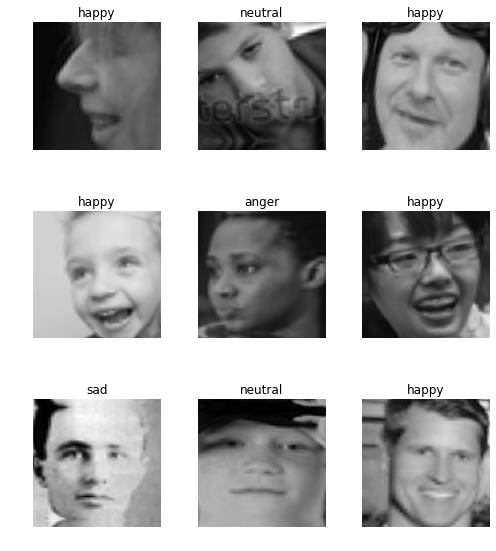

In [83]:
data.show_batch(rows=3, figsize=(7,8))

In [84]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['anger', 'happy', 'neutral', 'sad'], 4, 20823, 5205)

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [85]:
print(data.classes)
len(data.classes),data.c

['anger', 'happy', 'neutral', 'sad']


(4, 4)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. 

We will train for 4 epochs (4 cycles through all our data).

In [86]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [87]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.232898,1.101798,0.468204
2,1.038595,0.948772,0.401729
3,0.941862,0.879780,0.366571
4,0.902203,0.861298,0.357349


In [88]:
learn.save('stage-1')

In [89]:
learn.unfreeze()

In [90]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


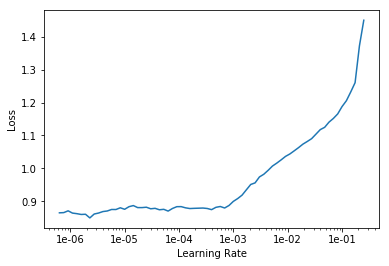

In [91]:
learn.recorder.plot()

In [92]:
lr = 0.00575

In [ ]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,0.682209,0.691870,0.270893
2,0.755619,0.797807,0.322767
3,0.669978,0.639883,0.251489
4,0.590073,0.584780,0.228242


In [72]:
learn.save('stage-2')

In [ ]:
#learn.model

In [73]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (20823 items)
[Category neutral, Category neutral, Category neutral, Category neutral, Category neutral]...
Path: data/FaceSquares
x: ImageItemList (20823 items)
[Image (3, 48, 48), Image (3, 48, 48), Image (3, 48, 48), Image (3, 48, 48), Image (3, 48, 48)]...
Path: data/FaceSquares;

Valid: LabelList
y: CategoryList (5205 items)
[Category happy, Category happy, Category happy, Category sad, Category anger]...
Path: data/FaceSquares
x: ImageItemList (5205 items)
[Image (3, 48, 48), Image (3, 48, 48), Image (3, 48, 48), Image (3, 48, 48), Image (3, 48, 48)]...
Path: data/FaceSquares;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequen

In [74]:
interp = ClassificationInterpretation.from_learner(learn)

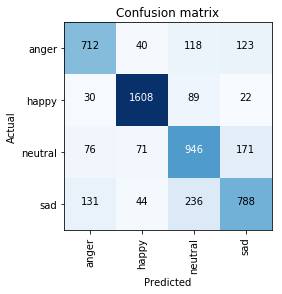

In [75]:
interp.plot_confusion_matrix()

In [29]:
learn.export()

# Cleaning the Data


In [76]:
from fastai.widgets import *


In [77]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

In [78]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [79]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)


Getting activations...


Computing similarities...


In [80]:
ImageCleaner(ds, idxs, path, duplicates=True)


Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Once you've cleaned the data, remake the DataBunch and retrain!

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

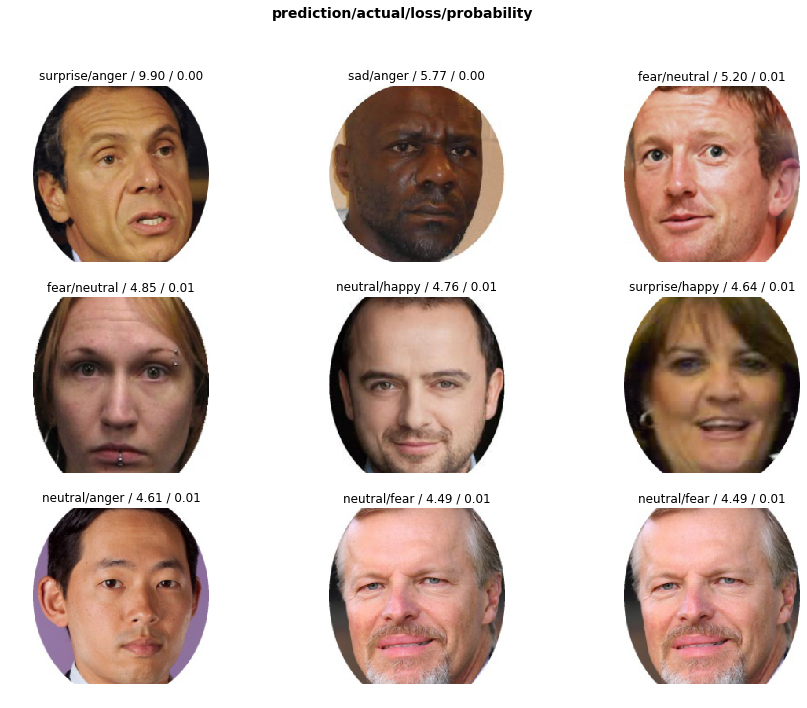

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [36]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.840168,1.118402,0.405405


In [38]:
learn.load('stage-1');

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


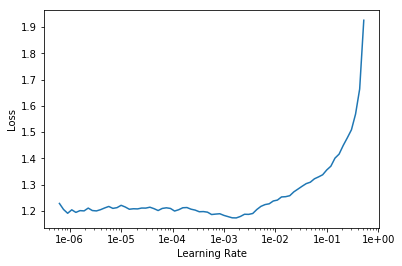

In [40]:
learn.recorder.plot()

In [42]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-25))

epoch,train_loss,valid_loss,error_rate
1,1.178504,1.151693,0.447174
2,1.142348,1.113862,0.429975


error rate after 2 epochs: .4299

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [44]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

NameError: name 'fnames' is not defined

In [10]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


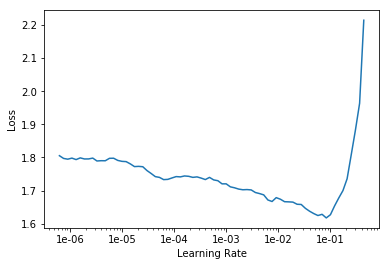

In [11]:
learn.lr_find()
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,1.945489,1.381856,0.538084
2,1.688977,1.393823,0.493858
3,1.474710,1.276523,0.486486
4,1.307552,1.183956,0.474201
5,1.177180,1.149389,0.449631
6,1.087160,1.096463,0.442260
7,0.996397,1.082281,0.429975
8,0.939038,1.081524,0.422604


In [12]:
learn.save('stage-1-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


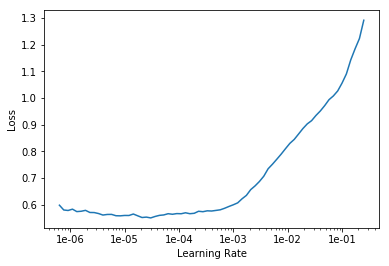

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
lr = .0045

In [17]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(lr))

epoch,train_loss,valid_loss,error_rate
1,0.863421,0.823924,0.341595
2,0.762177,0.672325,0.263977
3,0.604580,0.589069,0.228434


If it doesn't, you can always go back to your previous model.

In [18]:
learn.save('stage-2-50');

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

In [55]:
interp.most_confused(min_val=2)

[('fear', 'neutral', 17),
 ('sad', 'neutral', 17),
 ('anger', 'neutral', 16),
 ('neutral', 'fear', 16),
 ('sad', 'fear', 12),
 ('neutral', 'surprise', 11),
 ('neutral', 'sad', 10),
 ('surprise', 'neutral', 10),
 ('fear', 'happy', 6),
 ('anger', 'sad', 5),
 ('anger', 'surprise', 4),
 ('happy', 'surprise', 4),
 ('surprise', 'happy', 4),
 ('happy', 'neutral', 3),
 ('surprise', 'fear', 3)]

## Other data formats

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

In [ ]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

In [ ]:
df = pd.read_csv(path/'labels.csv')
df.head()

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

In [ ]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

In [ ]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

In [ ]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

In [ ]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes